In [1440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [1441]:
# Load the dataset
housing_data = pd.read_csv('housing_data.csv')

In [1442]:
housing_data

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0              0       SC60       RL           65     8450   Pave  None   
1              1       SC20       RL           80     9600   Pave  None   
2              2       SC60       RL           68    11250   Pave  None   
3              3       SC70       RL           60     9550   Pave  None   
4              4       SC60       RL           84    14260   Pave  None   
...          ...        ...      ...          ...      ...    ...   ...   
1455        1455       SC60       RL           62     7917   Pave  None   
1456        1456       SC20       RL           85    13175   Pave  None   
1457        1457       SC70       RL           66     9042   Pave  None   
1458        1458       SC20       RL           68     9717   Pave  None   
1459        1459       SC20       RL           75     9937   Pave  None   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0     No     No          No   
1         Reg         Lvl    AllPub  ...        0     No     No          No   
2         IR1         Lvl    AllPub  ...        0     No     No          No   
3         IR1         Lvl    AllPub  ...        0     No     No          No   
4         IR1         Lvl    AllPub  ...        0     No     No          No   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0     No     No          No   
1456      Reg         Lvl    AllPub  ...        0     No  MnPrv          No   
1457      Reg         Lvl    AllPub  ...        0     No  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0     No     No          No   
1459      Reg         Lvl    AllPub  ...        0     No     No          No   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0    Feb   2008        WD         Normal     208500  
1          0    May   2007        WD         Normal     181500  
2          0    Sep   2008        WD         Normal     223500  
3          0    Feb   2006        WD        Abnorml     140000  
4          0    Dec   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0    Aug   2007        WD         Normal     175000  
1456       0    Feb   2010        WD         Normal     210000  
1457    2500    May   2010        WD         Normal     266500  
1458       0    Apr   2010        WD         Normal     142125  
1459       0    Jun   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [1443]:
# Show first 5 rows
housing_data.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave  None      Reg   
1           1       SC20       RL           80     9600   Pave  None      Reg   
2           2       SC60       RL           68    11250   Pave  None      IR1   
3           3       SC70       RL           60     9550   Pave  None      IR1   
4           4       SC60       RL           84    14260   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [1444]:
# show last 5 rows
housing_data.tail()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
1455        1455       SC60       RL           62     7917   Pave  None   
1456        1456       SC20       RL           85    13175   Pave  None   
1457        1457       SC70       RL           66     9042   Pave  None   
1458        1458       SC20       RL           68     9717   Pave  None   
1459        1459       SC20       RL           75     9937   Pave  None   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
1455      Reg         Lvl    AllPub  ...        0     No     No          No   
1456      Reg         Lvl    AllPub  ...        0     No  MnPrv          No   
1457      Reg         Lvl    AllPub  ...        0     No  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0     No     No          No   
1459      Reg         Lvl    AllPub  ...        0     No     No          No   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455       0    Aug   2007        WD         Normal     175000  
1456       0    Feb   2010        WD         Normal     210000  
1457    2500    May   2010        WD         Normal     266500  
1458       0    Apr   2010        WD         Normal     142125  
1459       0    Jun   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [1445]:
housing_data.shape

(1460, 81)

In [1446]:
#check the variables
housing_data.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [1447]:
# Rename the columns for better understanding:
rename_col = {'MSSubClass':'Identifies_the_type_of_dwelling','LotConfig':'Lot_configuration','BldgType':'Type_of_dwelling',
              'RoofMatl':'Roof_material','MasVnrType':'Masonry_veneer_type',
              'Electrical':'Electrical_system','LowQualFinSF':'Low_quality_finished_square_feet',
              'KitchenQual':'Kitchen_Quality','GarageType':'Garage_location',
              'GarageCond':'Garage_condition','PavedDrive':'Paved driveway',
              'PoolQC':'Pool_quality','Fence':'Fence_Quality',
              'MiscFeature':'Miscellaneous_feature','MiscVal':'miscellaneous_feature'}

In [1448]:
housing_data=housing_data.rename(columns=rename_col)
housing_data.head()

Unnamed: 0 Identifies_the_type_of_dwelling MSZoning  LotFrontage  LotArea  \
0           0                            SC60       RL           65     8450   
1           1                            SC20       RL           80     9600   
2           2                            SC60       RL           68    11250   
3           3                            SC70       RL           60     9550   
4           4                            SC60       RL           84    14260   

  Street Alley LotShape LandContour Utilities  ... PoolArea Pool_quality  \
0   Pave  None      Reg         Lvl    AllPub  ...        0           No   
1   Pave  None      Reg         Lvl    AllPub  ...        0           No   
2   Pave  None      IR1         Lvl    AllPub  ...        0           No   
3   Pave  None      IR1         Lvl    AllPub  ...        0           No   
4   Pave  None      IR1         Lvl    AllPub  ...        0           No   

  Fence_Quality Miscellaneous_feature miscellaneous_feature MoSold YrSold  \
0            No                    No                     0    Feb   2008   
1            No                    No                     0    May   2007   
2            No                    No                     0    Sep   2008   
3            No                    No                     0    Feb   2006   
4            No                    No                     0    Dec   2008   

   SaleType  SaleCondition  SalePrice  
0        WD         Normal     208500  
1        WD         Normal     181500  
2        WD         Normal     223500  
3        WD        Abnorml     140000  
4        WD         Normal     250000  

[5 rows x 81 columns]

In [1449]:
housing_data.columns

Index(['Unnamed: 0', 'Identifies_the_type_of_dwelling', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'Lot_configuration', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'Type_of_dwelling', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Roof_material', 'Exterior1st', 'Exterior2nd', 'Masonry_veneer_type',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical_system', '1stFlrSF', '2ndFlrSF',
       'Low_quality_finished_square_feet', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'Kitchen_Quality', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'Garage_location', 'Ga

In [1450]:
housing_data.shape

(1460, 81)

In [1451]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        1460 non-null   int64  
 1   Identifies_the_type_of_dwelling   1460 non-null   object 
 2   MSZoning                          1460 non-null   object 
 3   LotFrontage                       1460 non-null   int64  
 4   LotArea                           1460 non-null   int64  
 5   Street                            1460 non-null   object 
 6   Alley                             1460 non-null   object 
 7   LotShape                          1460 non-null   object 
 8   LandContour                       1460 non-null   object 
 9   Utilities                         1460 non-null   object 
 10  Lot_configuration                 1460 non-null   object 
 11  LandSlope                         1460 non-null   object 
 12  Neighb

In [1452]:
# Get the desciptive statistics summary of my data:

In [1453]:
housing_data.describe()

Unnamed: 0  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    729.500000    57.623288   10516.828082     6.099315     5.575342   
std     421.610009    34.664304    9981.264932     1.382997     1.112799   
min       0.000000     0.000000    1300.000000     1.000000     1.000000   
25%     364.750000    42.000000    7553.500000     5.000000     5.000000   
50%     729.500000    63.000000    9478.500000     6.000000     5.000000   
75%    1094.250000    79.000000   11601.500000     7.000000     6.000000   
max    1459.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407   180.731373   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea  miscellaneous_feature       YrSold  \
count  1460.000000  1460.000000            1460.000000  1460.000000   
mean     15.060959     2.758904              43.489041  2007.815753   
std      55.757415    40.177307             496.123024     1.328095   
min       0.000000     0.000000               0.000000  2006.000000   
25%       0.000000     0.000000               0.000000  2007.000000   
50%       0.000000     0.000000               0.000000  2008.000000   
75%       0.000000     0.000000               0.000000  2009.000000   
max     480.000000   738.000000           15500.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 36 columns]

In [1454]:
# 2. Cleaning the data:
# Check the Duplicates In the dateset:
housing_data = housing_data.drop_duplicates()
housing_data.count()

Unnamed: 0                         1460
Identifies_the_type_of_dwelling    1460
MSZoning                           1460
LotFrontage                        1460
LotArea                            1460
                                   ... 
MoSold                             1460
YrSold                             1460
SaleType                           1460
SaleCondition                      1460
SalePrice                          1460
Length: 81, dtype: int64

In [1455]:
# Check the Null-values:
housing_data.isnull().sum().iloc[51:81]

BedroomAbvGr              0
KitchenAbvGr              0
Kitchen_Quality           0
TotRmsAbvGrd              0
Functional                0
Fireplaces                0
FireplaceQu               0
Garage_location           0
GarageYrBlt              81
GarageFinish              0
GarageCars                0
GarageArea                0
GarageQual                0
Garage_condition          0
Paved driveway            0
WoodDeckSF                0
OpenPorchSF               0
EnclosedPorch             0
3SsnPorch                 0
ScreenPorch               0
PoolArea                  0
Pool_quality              0
Fence_Quality             0
Miscellaneous_feature     0
miscellaneous_feature     0
MoSold                    0
YrSold                    0
SaleType                  0
SaleCondition             0
SalePrice                 0
dtype: int64

In [1456]:
# Drop the missing values & Columns:
housing_data['Alley'].isnull().mean()*100

0.0

In [1457]:
housing_data['GarageYrBlt'].isnull().mean()*100

5.5479452054794525

In [1458]:
housing_data['Masonry_veneer_type'].isnull().mean()*100

0.0

In [1459]:
housing_data['Electrical_system'].isnull().mean()*100

0.0684931506849315

In [1460]:
# Check the Null-Values in columns:
housing_data[housing_data['Electrical_system'].isnull()].iloc[:,30:50]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
1379       Gd       TA           No          Unf           0          Unf   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
1379           0        384          384    GasA        Gd          Y   

     Electrical_system  1stFlrSF  2ndFlrSF  Low_quality_finished_square_feet  \
1379               NaN       754       640                                 0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  
1379       1394             0             0         2

In [1461]:
housing_data['Electrical_system'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical_system, dtype: int64

In [1462]:
housing_data[housing_data['GarageYrBlt'].isnull()].iloc[:,30:50]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
39         No       No           No           No           0           No   
48         TA       TA           No          Unf           0          Unf   
78         TA       TA           No          Unf           0          Unf   
88         TA       Fa           No          Unf           0          Unf   
89         Gd       TA           No          GLQ         588          Unf   
...       ...      ...          ...          ...         ...          ...   
1349       TA       Fa           No          LwQ         259          Unf   
1407       TA       TA           No          ALQ         625          Unf   
1449       Gd       TA           Av          GLQ         553          Unf   
1450       Gd       TA           No          Unf           0          Unf   
1453       Gd       TA           No          Unf           0          Unf   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
39             0          0            0    GasA        TA          N   
48             0        736          736    GasA        Gd          Y   
78             0       1768         1768    GasA        TA          N   
88             0       1013         1013    GasA        TA          N   
89             0        402          990    GasA        Ex          Y   
...          ...        ...          ...     ...       ...        ...   
1349           0        425          684    OthW        Fa          N   
1407           0        208          833    GasA        Ex          Y   
1449           0         77          630    GasA        Ex          Y   
1450           0        896          896    GasA        TA          Y   
1453           0       1140         1140    GasA        Ex          Y   

     Electrical_system  1stFlrSF  2ndFlrSF  Low_quality_finished_square_feet  \
39               FuseP      1152         0                                 0   
48               SBrkr       736       716                                 0   
78               SBrkr      1768         0                                 0   
88               SBrkr      1013         0                               513   
89               SBrkr       990         0                                 0   
...                ...       ...       ...                               ...   
1349             SBrkr       938      1215                               205   
1407             SBrkr       833         0                                 0   
1449             SBrkr       630         0                                 0   
1450             SBrkr       896       896                                 0   
1453             SBrkr      1140         0                                 0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  
39         1152             0             0         2  
48         1452             0             0         2  
78         1768             0             0         2  
88         1526             0             0         1  
89          990             1             0         1  
...         ...           ...           ...       ...  
1349       2358             0             0         2  
1407        833             1             0         1  
1449        630             1             0         1  
1450       1792             0             0         2  
1453       1140             0             0         1  

[81 rows x 20 columns]

In [1463]:
housing_data['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [1464]:
# Replace the Null-Values with the most occuring value:
housing_data['Electrical_system']=housing_data['Electrical_system'].fillna('SBrkr')

In [1465]:
housing_data['GarageYrBlt']=housing_data['GarageYrBlt'].fillna(2005.0)

In [1466]:
# Removing of Null-Values:
housing_data['Electrical_system'].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical_system, dtype: int64

In [1467]:
housing_data['GarageYrBlt'].value_counts()

2005.0    146
2006.0     59
2004.0     53
2003.0     50
2007.0     49
         ... 
1927.0      1
1900.0      1
1906.0      1
1908.0      1
1933.0      1
Name: GarageYrBlt, Length: 97, dtype: int64

In [1468]:
housing_data[['Electrical_system','GarageYrBlt']].isnull().sum()

Electrical_system    0
GarageYrBlt          0
dtype: int64

In [1469]:
housing_data.shape

(1460, 81)

In [1470]:
# Drop unnecessary Columns:
housing_data=housing_data.drop(['Alley','Masonry_veneer_type','Unnamed: 0'], axis=1)

In [1471]:
housing_data

Identifies_the_type_of_dwelling MSZoning  LotFrontage  LotArea Street  \
0                               SC60       RL           65     8450   Pave   
1                               SC20       RL           80     9600   Pave   
2                               SC60       RL           68    11250   Pave   
3                               SC70       RL           60     9550   Pave   
4                               SC60       RL           84    14260   Pave   
...                              ...      ...          ...      ...    ...   
1455                            SC60       RL           62     7917   Pave   
1456                            SC20       RL           85    13175   Pave   
1457                            SC70       RL           66     9042   Pave   
1458                            SC20       RL           68     9717   Pave   
1459                            SC20       RL           75     9937   Pave   

     LotShape LandContour Utilities Lot_configuration LandSlope  ... PoolArea  \
0         Reg         Lvl    AllPub            Inside       Gtl  ...        0   
1         Reg         Lvl    AllPub               FR2       Gtl  ...        0   
2         IR1         Lvl    AllPub            Inside       Gtl  ...        0   
3         IR1         Lvl    AllPub            Corner       Gtl  ...        0   
4         IR1         Lvl    AllPub               FR2       Gtl  ...        0   
...       ...         ...       ...               ...       ...  ...      ...   
1455      Reg         Lvl    AllPub            Inside       Gtl  ...        0   
1456      Reg         Lvl    AllPub            Inside       Gtl  ...        0   
1457      Reg         Lvl    AllPub            Inside       Gtl  ...        0   
1458      Reg         Lvl    AllPub            Inside       Gtl  ...        0   
1459      Reg         Lvl    AllPub            Inside       Gtl  ...        0   

     Pool_quality Fence_Quality Miscellaneous_feature miscellaneous_feature  \
0              No            No                    No                     0   
1              No            No                    No                     0   
2              No            No                    No                     0   
3              No            No                    No                     0   
4              No            No                    No                     0   
...           ...           ...                   ...                   ...   
1455           No            No                    No                     0   
1456           No         MnPrv                    No                     0   
1457           No         GdPrv                  Shed                  2500   
1458           No            No                    No                     0   
1459           No            No                    No                     0   

      MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        Feb    2008        WD         Normal    208500  
1        May    2007        WD         Normal    181500  
2        Sep    2008        WD         Normal    223500  
3        Feb    2006        WD        Abnorml    140000  
4        Dec    2008        WD         Normal    250000  
...      ...     ...       ...            ...       ...  
1455     Aug    2007        WD         Normal    175000  
1456     Feb    2010        WD         Normal    210000  
1457     May    2010        WD         Normal    266500  
1458     Apr    2010        WD         Normal    142125  
1459     Jun    2008        WD         Normal    147500  

[1460 rows x 78 columns]

In [1472]:
# Convert float column into int64:
housing_data['GarageYrBlt']=housing_data['GarageYrBlt'].replace(to_replace=np.nan,value=0).astype('int64')

In [1473]:
housing_data['GarageYrBlt'].value_counts

<bound method IndexOpsMixin.value_counts of 0       2003
1       1976
2       2001
3       1998
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: GarageYrBlt, Length: 1460, dtype: int64>

In [1474]:
housing_data['GarageYrBlt'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1460 entries, 0 to 1459
Series name: GarageYrBlt
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 22.8 KB


In [1475]:
housing_data['GarageYrBlt'].isnull().sum()

0

In [1476]:
housing_data.shape

(1460, 78)

In [1477]:
# Check the Duplicate Entries:
housing_data.duplicated().sum()

0

In [1478]:
# Replaced the values in the 'Identifies the type of dwelling' column:
housing_data['Identifies_the_type_of_dwelling'].value_counts()

SC20     536
SC60     299
SC50     144
SC120     87
SC30      69
SC160     63
SC70      60
SC80      58
SC90      52
SC190     30
SC85      20
SC75      16
SC45      12
SC180     10
SC40       4
Name: Identifies_the_type_of_dwelling, dtype: int64

In [1479]:
housing_data['Identifies_the_type_of_dwelling']=housing_data['Identifies_the_type_of_dwelling'].replace({'SC60':'2-STORY 1946 & NEWER','SC20':'1-STORY 1946 & NEWER ALL STYLES','SC70':'2-STORY 1945 & OLDER','SC50':'1-1/2 STORY FINISHED ALL AGES','SC120':'1-STORY PUD (Planned Unit Development) - 1946 & NEWER','SC160':'2-STORY PUD - 1946 & NEWER','SC80':' SPLIT OR MULTI-LEVEL','SC30':'1-STORY 1945 & OLDER','SC90':'DUPLEX - ALL STYLES AND AGES',
                                                                              'SC190':'2 FAMILY CONVERSION - ALL STYLES AND AGES','SC85':'SPLIT FOYER','SC75':'2-1/2 STORY ALL AGES','SC45':' 1-1/2 STORY - UNFINISHED ALL AGES','SC180':'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER','SC40':'1-STORY W/FINISHED ATTIC ALL AGES'})

In [1480]:
housing_data.sample(3)

Identifies_the_type_of_dwelling MSZoning  LotFrontage  LotArea Street  \
579    1-1/2 STORY FINISHED ALL AGES       RM           81    12150   Pave   
910     DUPLEX - ALL STYLES AND AGES       RL           80    11600   Pave   
768  1-STORY 1946 & NEWER ALL STYLES       RL           70     9100   Pave   

    LotShape LandContour Utilities Lot_configuration LandSlope  ... PoolArea  \
579      Reg         Lvl    AllPub            Inside       Gtl  ...        0   
910      Reg         Lvl    AllPub            Corner       Gtl  ...        0   
768      Reg         Lvl    AllPub            Inside       Gtl  ...        0   

    Pool_quality Fence_Quality Miscellaneous_feature miscellaneous_feature  \
579           No            No                    No                     0   
910           No            No                    No                     0   
768           No            No                    No                     0   

     MoSold  YrSold  SaleType  SaleCondition SalePrice  
579     Nov    2008        WD         Normal    131500  
910     Jan    2010        WD         Normal    154300  
768     Oct    2006        WD         Normal    216837  

[3 rows x 78 columns]

In [1481]:
# 3. Univariate Analysis:
housing_data.head()

Identifies_the_type_of_dwelling MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL           65     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL           80     9600   Pave   
2             2-STORY 1946 & NEWER       RL           68    11250   Pave   
3             2-STORY 1945 & OLDER       RL           60     9550   Pave   
4             2-STORY 1946 & NEWER       RL           84    14260   Pave   

  LotShape LandContour Utilities Lot_configuration LandSlope  ... PoolArea  \
0      Reg         Lvl    AllPub            Inside       Gtl  ...        0   
1      Reg         Lvl    AllPub               FR2       Gtl  ...        0   
2      IR1         Lvl    AllPub            Inside       Gtl  ...        0   
3      IR1         Lvl    AllPub            Corner       Gtl  ...        0   
4      IR1         Lvl    AllPub               FR2       Gtl  ...        0   

  Pool_quality Fence_Quality Miscellaneous_feature miscellaneous_feature  \
0           No            No                    No                     0   
1           No            No                    No                     0   
2           No            No                    No                     0   
3           No            No                    No                     0   
4           No            No                    No                     0   

   MoSold  YrSold  SaleType  SaleCondition SalePrice  
0     Feb    2008        WD         Normal    208500  
1     May    2007        WD         Normal    181500  
2     Sep    2008        WD         Normal    223500  
3     Feb    2006        WD        Abnorml    140000  
4     Dec    2008        WD         Normal    250000  

[5 rows x 78 columns]

In [1482]:
housing_data.tail()

Identifies_the_type_of_dwelling MSZoning  LotFrontage  LotArea Street  \
1455             2-STORY 1946 & NEWER       RL           62     7917   Pave   
1456  1-STORY 1946 & NEWER ALL STYLES       RL           85    13175   Pave   
1457             2-STORY 1945 & OLDER       RL           66     9042   Pave   
1458  1-STORY 1946 & NEWER ALL STYLES       RL           68     9717   Pave   
1459  1-STORY 1946 & NEWER ALL STYLES       RL           75     9937   Pave   

     LotShape LandContour Utilities Lot_configuration LandSlope  ... PoolArea  \
1455      Reg         Lvl    AllPub            Inside       Gtl  ...        0   
1456      Reg         Lvl    AllPub            Inside       Gtl  ...        0   
1457      Reg         Lvl    AllPub            Inside       Gtl  ...        0   
1458      Reg         Lvl    AllPub            Inside       Gtl  ...        0   
1459      Reg         Lvl    AllPub            Inside       Gtl  ...        0   

     Pool_quality Fence_Quality Miscellaneous_feature miscellaneous_feature  \
1455           No            No                    No                     0   
1456           No         MnPrv                    No                     0   
1457           No         GdPrv                  Shed                  2500   
1458           No            No                    No                     0   
1459           No            No                    No                     0   

      MoSold  YrSold  SaleType  SaleCondition SalePrice  
1455     Aug    2007        WD         Normal    175000  
1456     Feb    2010        WD         Normal    210000  
1457     May    2010        WD         Normal    266500  
1458     Apr    2010        WD         Normal    142125  
1459     Jun    2008        WD         Normal    147500  

[5 rows x 78 columns]

In [1483]:
housing_data.shape

(1460, 78)

In [1484]:
import warnings
warnings.filterwarnings("ignore")

In [1485]:
housing_data = housing_data.select_dtypes(include=["int64","float64"])

In [1486]:
#removing out liers
for i in housing_data.columns:
    Q1=housing_data[i].quantile(0.25)
    print("The first quantile for the column",i,"is given by",Q1)
    Q2=housing_data[i].quantile(0.50)
    print("The second quantile for the column",i,"is given by",Q2)
    Q3=housing_data[i].quantile(0.75)
    print("The Third quantile for the column",i,"is given by",Q3)
    IQR=housing_data[i].quantile(0.75)-housing_data[i].quantile(0.25)
    print("The interquantile range for the column",i,"is given by",IQR)
    LL=housing_data[i].quantile(0.25)-1.5*(housing_data[i].quantile(0.75)-housing_data[i].quantile(0.25))
    print("The lower limit for the columns",i,"is given by",LL)
    Ul=housing_data[i].quantile(0.75)+1.5*(housing_data[i].quantile(0.75)-housing_data[i].quantile(0.25))
    print("The Upperlimit for the columns",i,'is given by',Ul)
    n=housing_data[(housing_data[i]<LL)|(housing_data[i]>Ul)].count()[0]
    print("The number of outlaier for columns",i,"is given by",n)
    housing_data[i]=np.where((housing_data[i]<LL)|(housing_data[i]>Ul),housing_data[i].mean(),housing_data[i])
    
    
    
    m=housing_data[(housing_data[i]<LL)|(housing_data[i]>Ul)].count()[0]
    print("The number of outliar after imputation is given by",m)
    print("  ")
    print("  ")

The first quantile for the column LotFrontage is given by 42.0
The second quantile for the column LotFrontage is given by 63.0
The Third quantile for the column LotFrontage is given by 79.0
The interquantile range for the column LotFrontage is given by 37.0
The lower limit for the columns LotFrontage is given by -13.5
The Upperlimit for the columns LotFrontage is given by 134.5
The number of outlaier for columns LotFrontage is given by 16
The number of outliar after imputation is given by 0
  
  
The first quantile for the column LotArea is given by 7553.5
The second quantile for the column LotArea is given by 9478.5
The Third quantile for the column LotArea is given by 11601.5
The interquantile range for the column LotArea is given by 4048.0
The lower limit for the columns LotArea is given by 1481.5
The Upperlimit for the columns LotArea is given by 17673.5
The number of outlaier for columns LotArea is given by 69
The number of outliar after imputation is given by 0
  
  
The first qu

In [1487]:
from scipy.stats.mstats import winsorize
# Function to Winsorize outliers
outlier_columns = ['LotArea', 'MasVnrArea', 'OpenPorchSF', 'SalePrice']
def winsorize_outliers(df, columns, limit=0.05):
    df_clean = df.copy()
    for col in columns:
        df_clean[col] = winsorize(df_clean[col], limits=[limit, limit])
    return df_clean
df = winsorize_outliers(housing_data, outlier_columns)
print(df[outlier_columns].describe())

            LotArea   MasVnrArea  OpenPorchSF      SalePrice
count   1460.000000  1460.000000  1460.000000    1460.000000
mean    9311.930916    66.653067    35.190987  169982.241061
std     2882.824357    97.466101    40.781173   53517.305157
min     3378.000000     0.000000     0.000000   88000.000000
25%     7560.000000     0.000000     0.000000  129975.000000
50%     9491.000000     0.000000    25.000000  163000.000000
75%    11107.250000   106.000000    56.000000  200110.250000
max    14572.000000   302.000000   130.000000  284000.000000


In [1488]:
housing_data.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'Low_quality_finished_square_feet', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'miscellaneous_feature', 'YrSold',
       'SalePrice'],
      dtype='object')

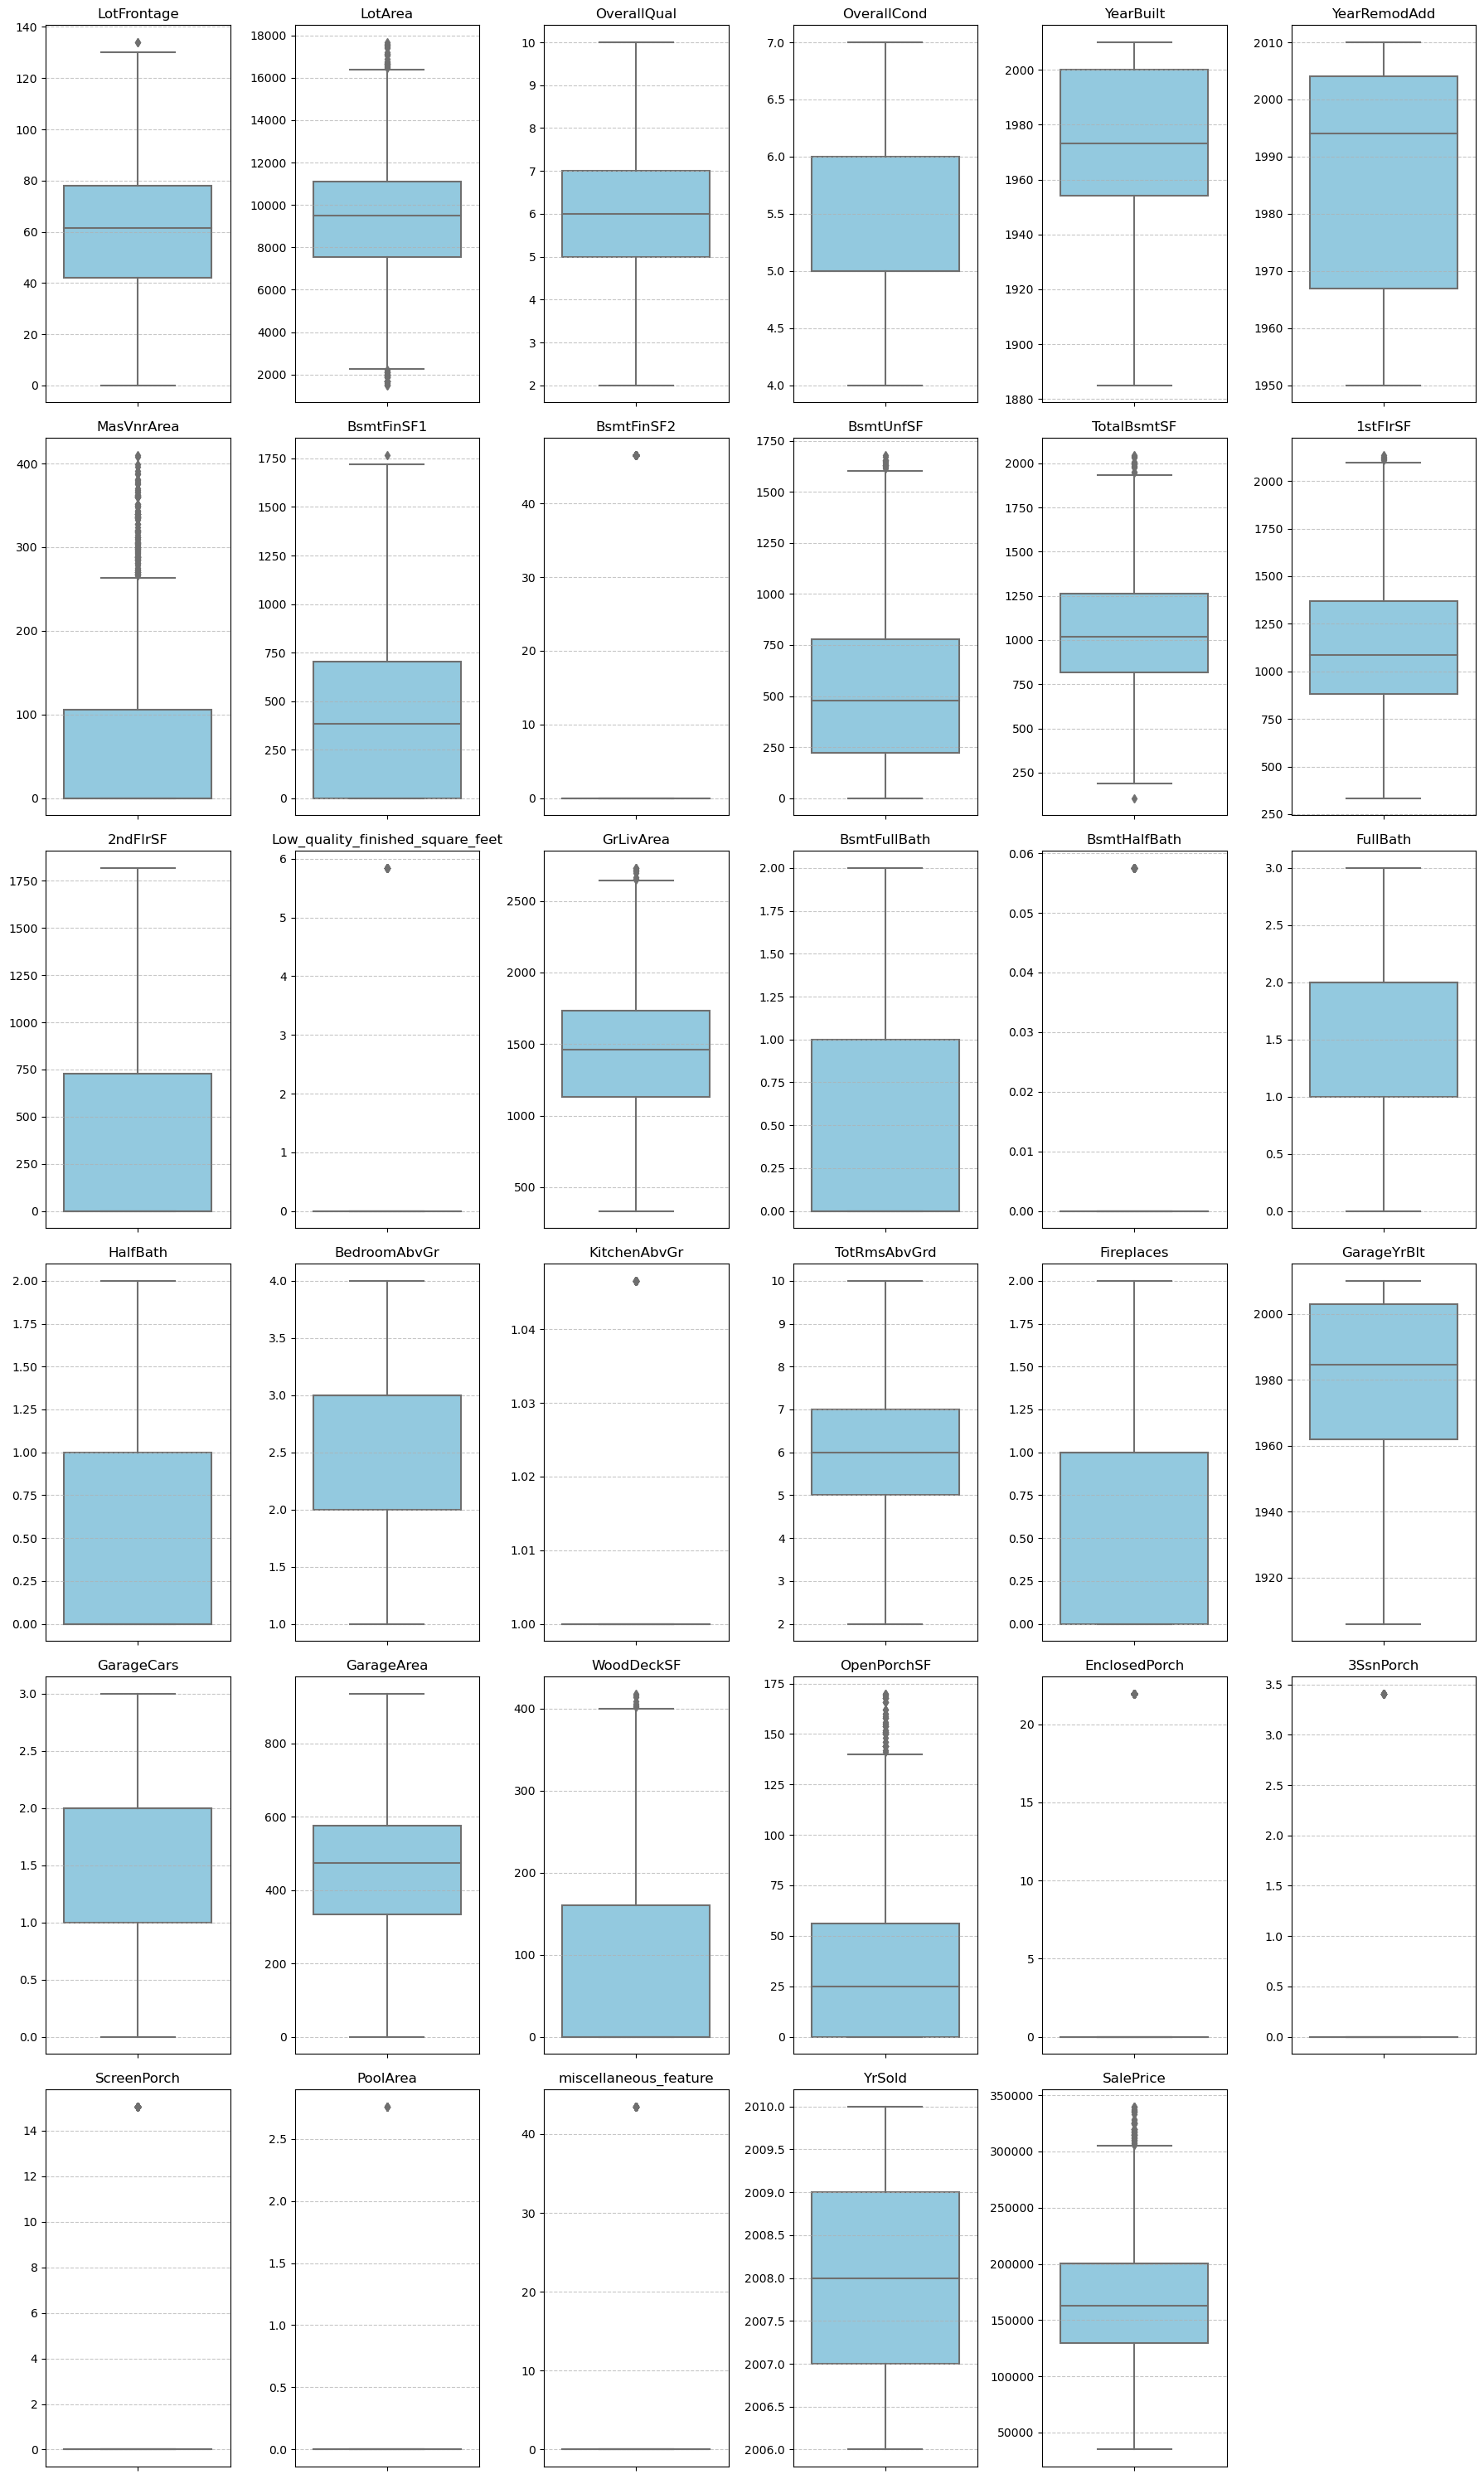

In [1489]:
# Select numerical columns
numerical = housing_data.select_dtypes(include=['float64', 'int64']).columns

if len(numerical) > 0:
    # Define number of rows and columns for subplots
    n_cols = 6
    n_rows = -(-len(numerical) // n_cols)  # Ceiling division for rows
    
    plt.figure(figsize=(18, 5 * n_rows))
    
    for i, col in enumerate(numerical, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(y=housing_data[col], color='skyblue')
        plt.title(col, fontsize=12)
        plt.ylabel('')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found in the DataFrame.")


In [1490]:
lower_limit_iqr, upper_limit_iqr = iqr_technique(housing_data['LotFrontage'])
housing_data['LotFrontage'] = np.where(housing_data['LotFrontage'] > upper_limit_iqr, 
                                     upper_limit_iqr, 
                                     np.where(housing_data['LotFrontage'] < lower_limit_iqr, 
                                              lower_limit_iqr, 
                                              housing_data['LotFrontage']))


In [1491]:
lower_limit_iqr, upper_limit_iqr = iqr_technique(housing_data['LotArea'])
housing_data['LotArea'] = np.where(housing_data['LotArea'] > upper_limit_iqr, 
                                     upper_limit_iqr, 
                                     np.where(housing_data['LotArea'] < lower_limit_iqr, 
                                              lower_limit_iqr, 
                                              housing_data['LotArea']))


In [1492]:
lower_limit_iqr, upper_limit_iqr = iqr_technique(housing_data['MasVnrArea'])
housing_data['MasVnrArea'] = np.where(housing_data['MasVnrArea'] > upper_limit_iqr, 
                                     upper_limit_iqr, 
                                     np.where(housing_data['MasVnrArea'] < lower_limit_iqr, 
                                              lower_limit_iqr, 
                                              housing_data['MasVnrArea']))


In [1493]:
lower_limit_iqr, upper_limit_iqr = iqr_technique(housing_data['BsmtFinSF1'])
housing_data['BsmtFinSF1'] = np.where(housing_data['BsmtFinSF1'] > upper_limit_iqr, 
                                     upper_limit_iqr, 
                                     np.where(housing_data['BsmtFinSF1'] < lower_limit_iqr, 
                                              lower_limit_iqr, 
                                              housing_data['BsmtFinSF1']))


In [1494]:
lower_limit_iqr, upper_limit_iqr = iqr_technique(housing_data['BsmtUnfSF'])
housing_data['BsmtUnfSF'] = np.where(housing_data['BsmtUnfSF'] > upper_limit_iqr, 
                                     upper_limit_iqr, 
                                     np.where(housing_data['BsmtUnfSF'] < lower_limit_iqr, 
                                              lower_limit_iqr, 
                                              housing_data['BsmtUnfSF']))


In [1495]:
lower_limit_iqr, upper_limit_iqr = iqr_technique(housing_data['TotalBsmtSF'])
housing_data['TotalBsmtSF'] = np.where(housing_data['TotalBsmtSF'] > upper_limit_iqr, 
                                     upper_limit_iqr, 
                                     np.where(housing_data['TotalBsmtSF'] < lower_limit_iqr, 
                                              lower_limit_iqr, 
                                              housing_data['TotalBsmtSF']))


In [1496]:
lower_limit_iqr, upper_limit_iqr = iqr_technique(housing_data['1stFlrSF'])
housing_data['1stFlrSF'] = np.where(housing_data['1stFlrSF'] > upper_limit_iqr, 
                                     upper_limit_iqr, 
                                     np.where(housing_data['1stFlrSF'] < lower_limit_iqr, 
                                              lower_limit_iqr, 
                                              housing_data['1stFlrSF']))


In [1497]:
lower_limit_iqr, upper_limit_iqr = iqr_technique(housing_data['LotFrontage'])
housing_data['LotFrontage'] = np.where(housing_data['LotFrontage'] > upper_limit_iqr, 
                                     upper_limit_iqr, 
                                     np.where(housing_data['LotFrontage'] < lower_limit_iqr, 
                                              lower_limit_iqr, 
                                              housing_data['LotFrontage']))


In [1498]:
lower_limit_iqr, upper_limit_iqr = iqr_technique(housing_data['WoodDeckSF'])
housing_data['WoodDeckSF'] = np.where(housing_data['LotFrontage'] > upper_limit_iqr, 
                                     upper_limit_iqr, 
                                     np.where(housing_data['WoodDeckSF'] < lower_limit_iqr, 
                                              lower_limit_iqr, 
                                              housing_data['WoodDeckSF']))


In [1499]:
lower_limit_iqr, upper_limit_iqr = iqr_technique(housing_data['OpenPorchSF'])
housing_data['OpenPorchSF'] = np.where(housing_data['OpenPorchSF'] > upper_limit_iqr, 
                                     upper_limit_iqr, 
                                     np.where(housing_data['OpenPorchSF'] < lower_limit_iqr, 
                                              lower_limit_iqr, 
                                              housing_data['OpenPorchSF']))


In [1500]:
lower_limit_iqr, upper_limit_iqr = iqr_technique(housing_data['GrLivArea'])
housing_data['GrLivArea'] = np.where(housing_data['GrLivArea'] > upper_limit_iqr, 
                                     upper_limit_iqr, 
                                     np.where(housing_data['GrLivArea'] < lower_limit_iqr, 
                                              lower_limit_iqr, 
                                              housing_data['GrLivArea']))


In [1501]:
lower_limit_iqr, upper_limit_iqr = iqr_technique(housing_data['SalePrice'])
housing_data['SalePrice'] = np.where(housing_data['SalePrice'] > upper_limit_iqr, 
                                     upper_limit_iqr, 
                                     np.where(housing_data['SalePrice'] < lower_limit_iqr, 
                                              lower_limit_iqr, 
                                              housing_data['SalePrice']))


In [1502]:
# Remove spaces in column names
housing_data.columns = housing_data.columns.str.strip()

# Check if PricePerSqFt exists
if 'PricePerSqFt' in housing_data.columns:
    lower_limit = 31.92867451213431
    upper_limit = 106.62368107360518
    mean_value = housing_data['PricePerSqFt'].mean()

    # Replace outliers
    housing_data['PricePerSqFt'] = np.where((housing_data['PricePerSqFt'] < lower_limit) | 
                                            (housing_data['PricePerSqFt'] > upper_limit), 
                                            mean_value, 
                                            housing_data['PricePerSqFt'])
else:
    print("Error: Column 'PricePerSqFt' not found!")


Error: Column 'PricePerSqFt' not found!


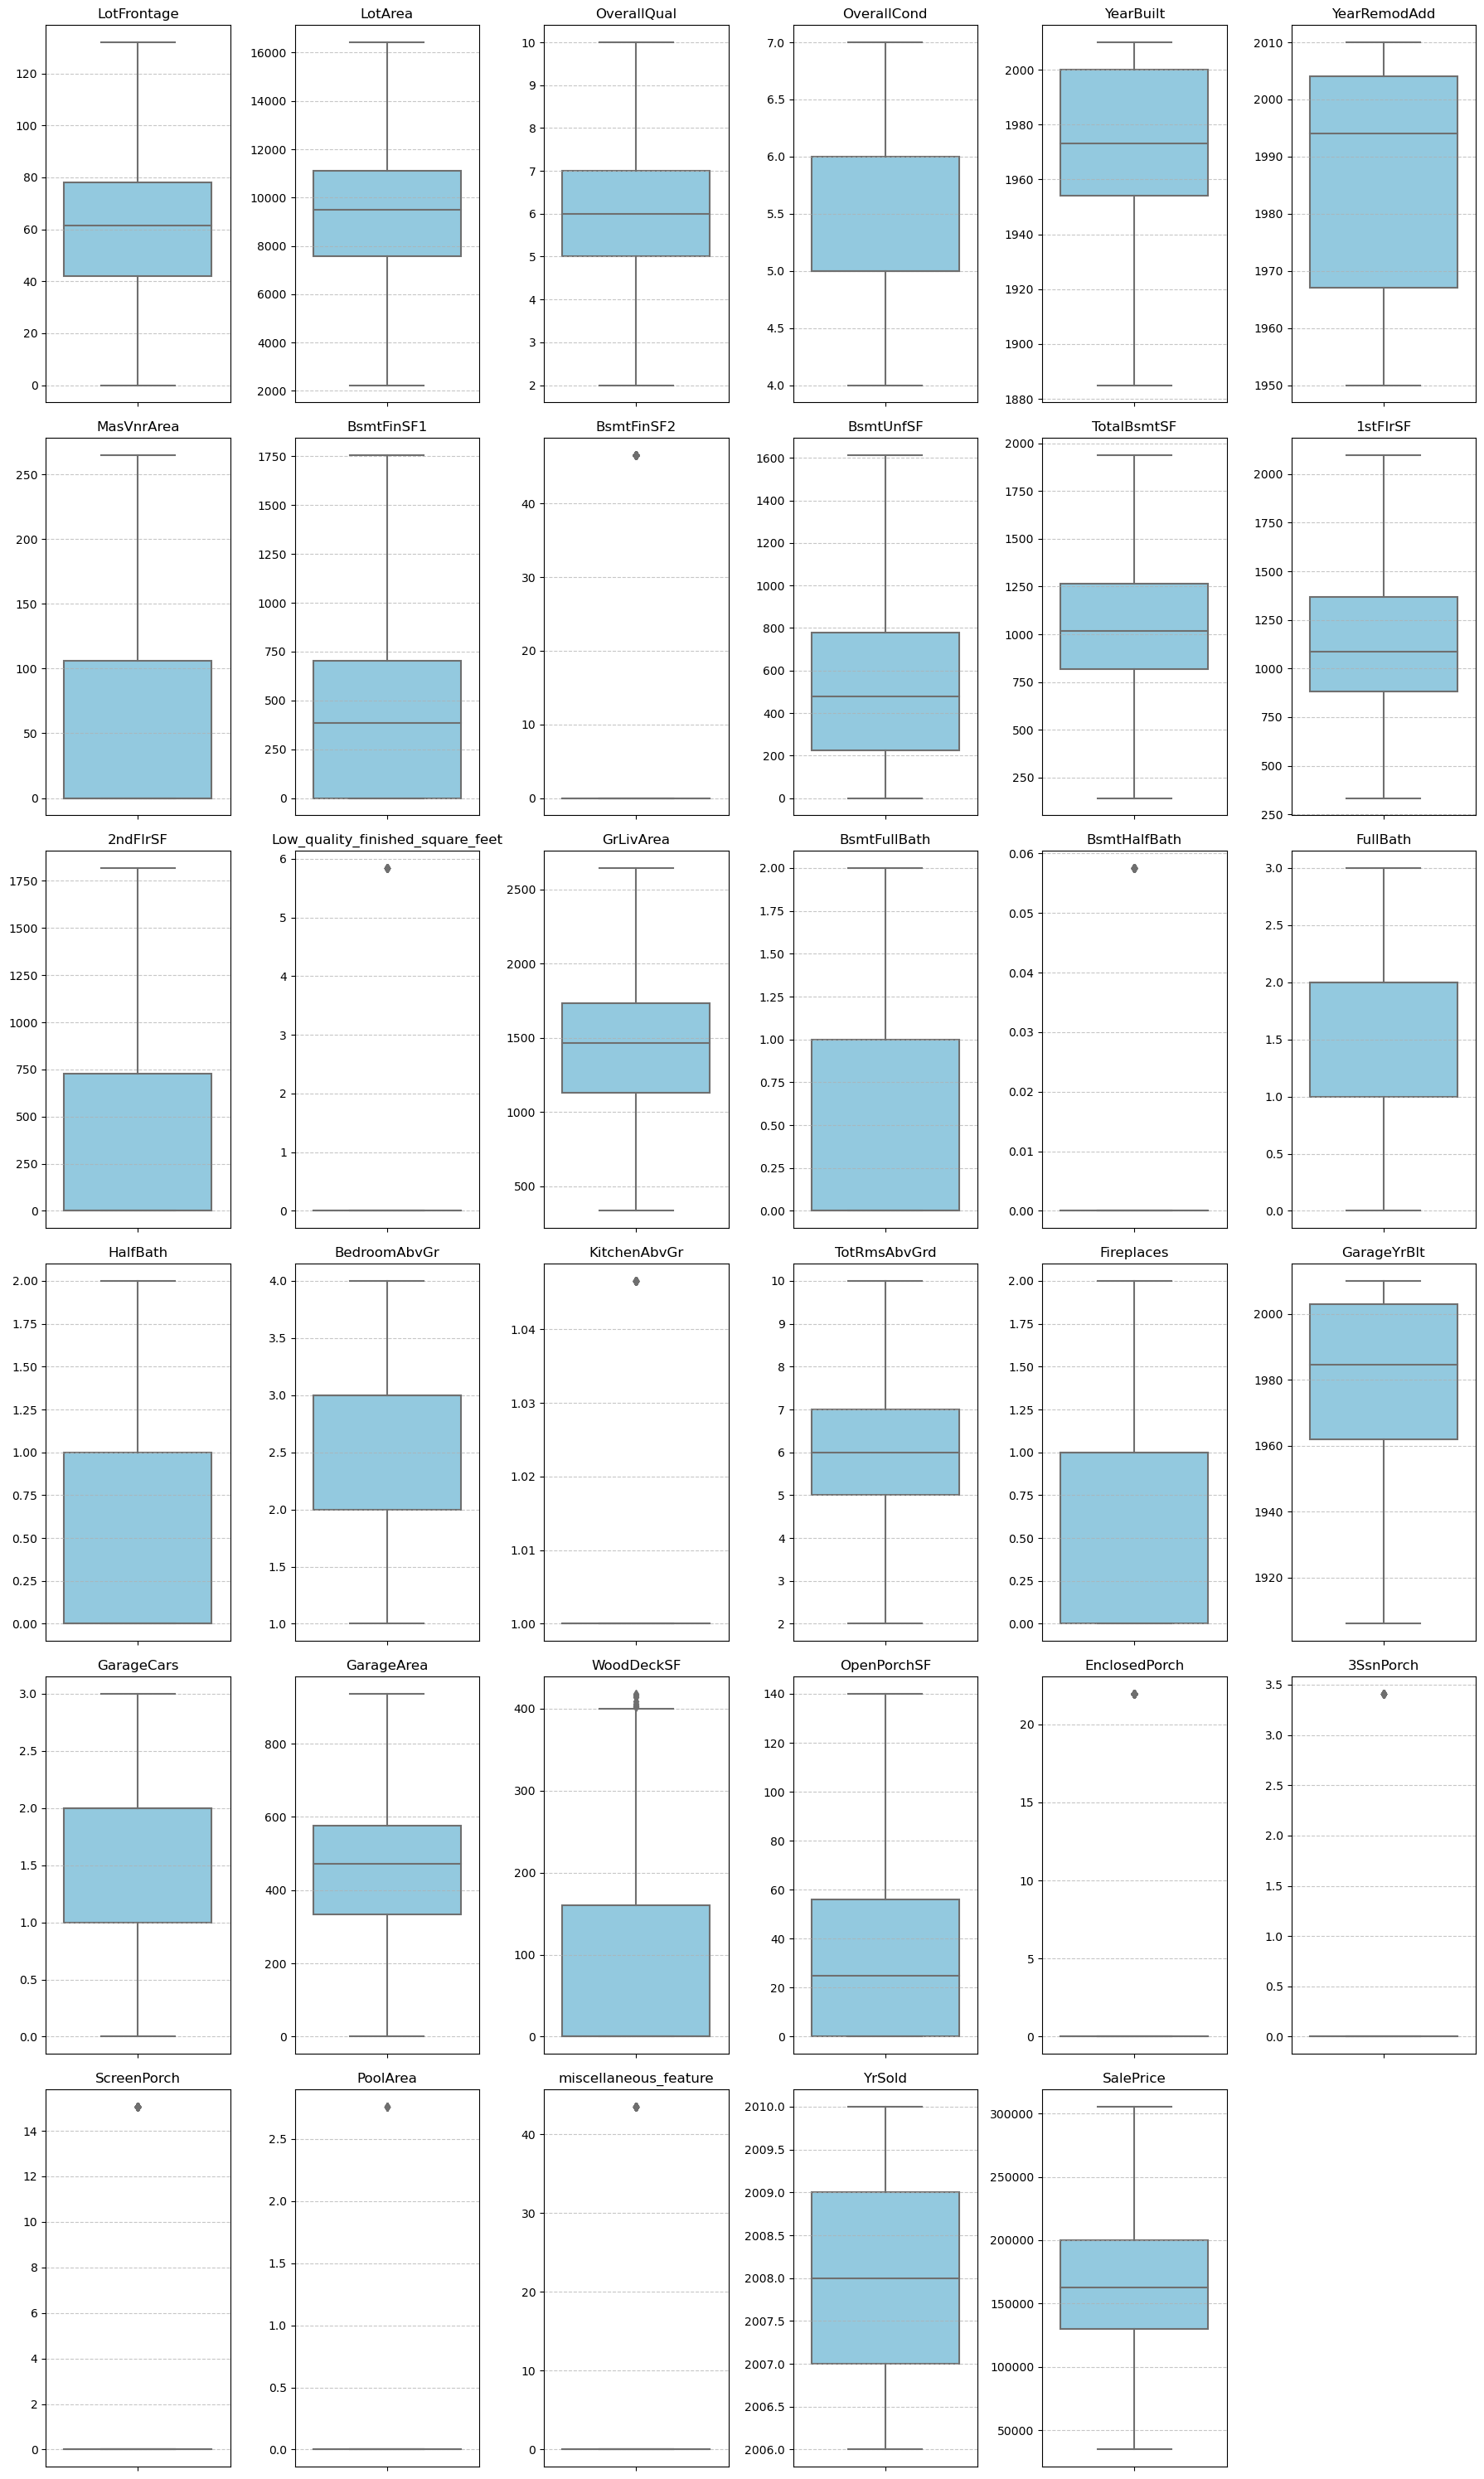

In [1503]:
# Select numerical columns
numerical = housing_data.select_dtypes(include=['float64', 'int64']).columns

if len(numerical) > 0:
    # Define number of rows and columns for subplots
    n_cols = 6
    n_rows = -(-len(numerical) // n_cols)  # Ceiling division for rows
    
    plt.figure(figsize=(18, 5 * n_rows))
    
    for i, col in enumerate(numerical, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(y=housing_data[col], color='skyblue')
        plt.title(col, fontsize=12)
        plt.ylabel('')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found in the DataFrame.")


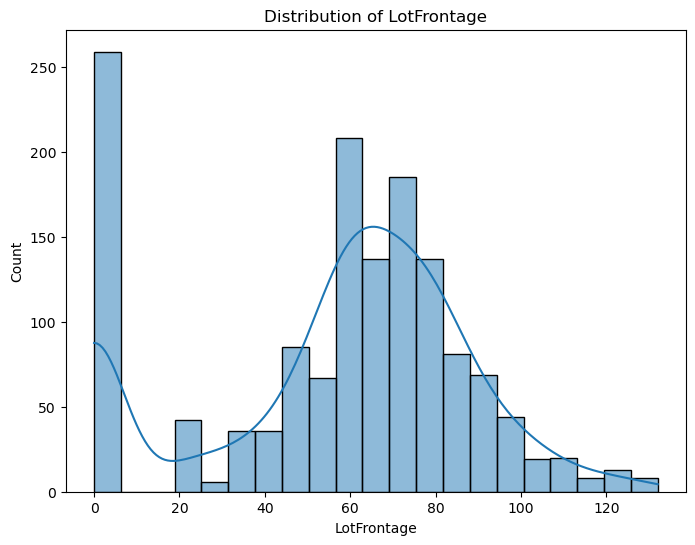

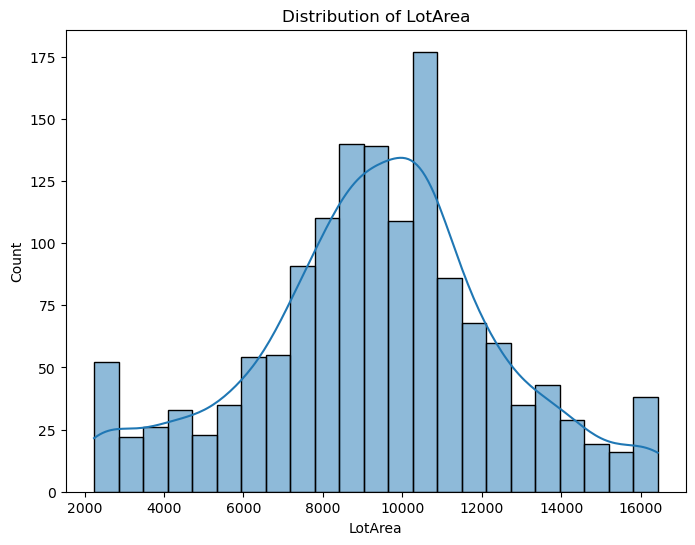

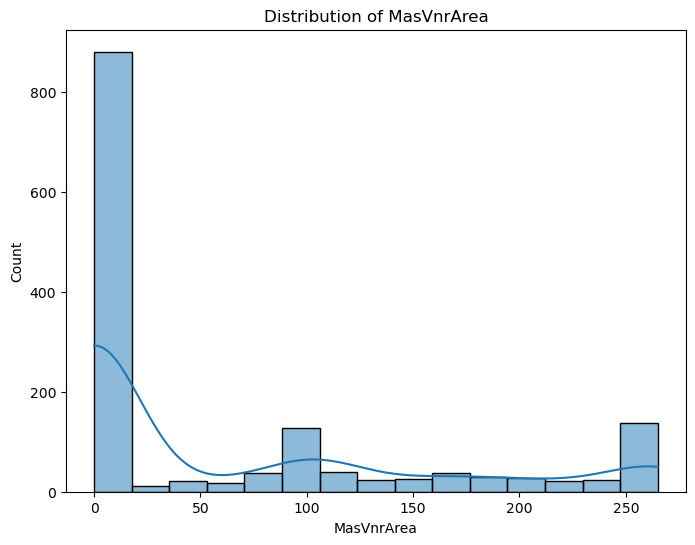

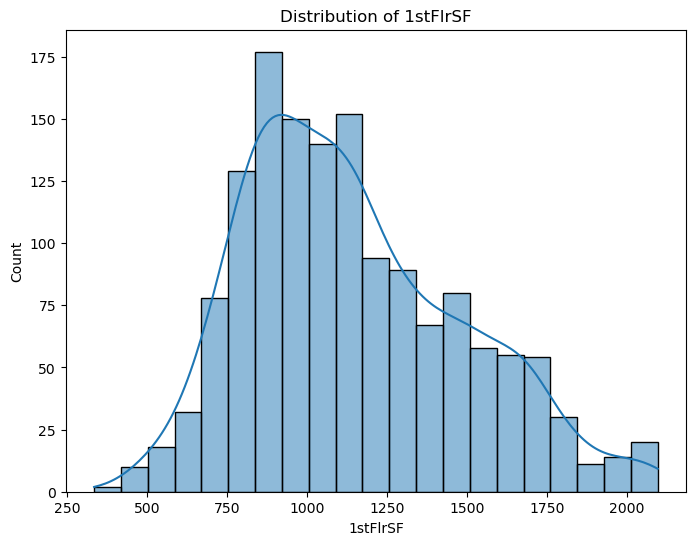

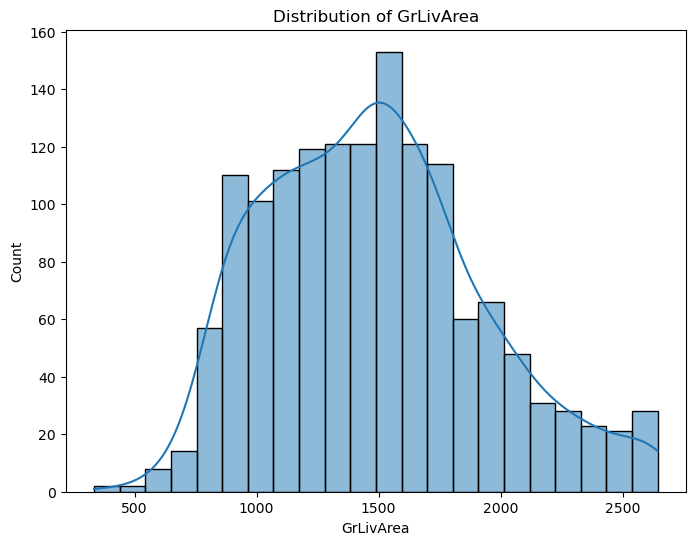

In [1504]:
numeric_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', '1stFlrSF', 'GrLivArea']
for var in numeric_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=housing_data, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

In [1505]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_vars = ['Identifies_the_type_of_dwelling', 'Street', 'Lot_configuration', 'LotShape']

for var in categorical_vars:
    if var in housing_data.columns:  # Ensure column exists
        plt.figure(figsize=(8, 6))
        sns.countplot(data=housing_data, x=var, palette="viridis")  # Add color
        plt.title(f'Count of {var}')
        plt.xticks(rotation=45)  # Rotate labels for readability
        plt.show()
    else:
        print(f"Warning: Column '{var}' not found in DataFrame!")


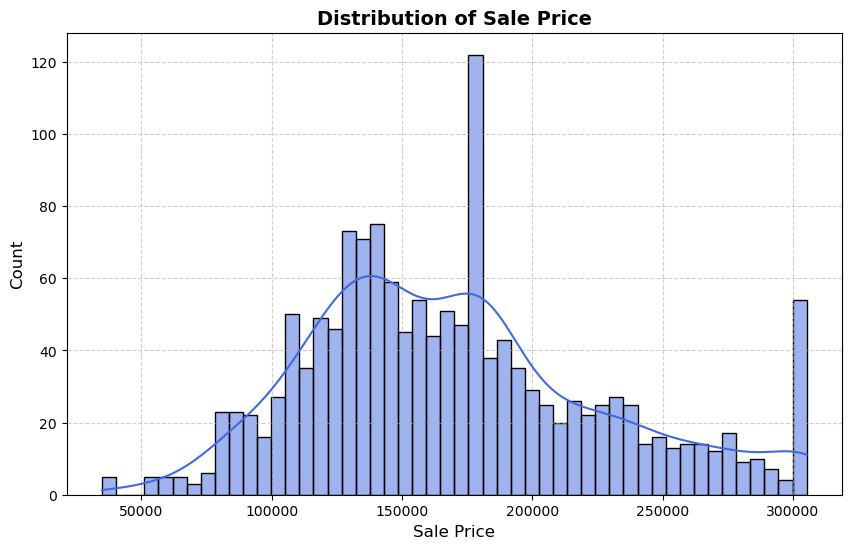

In [1506]:
plt.figure(figsize=(10, 6))  # Slightly larger for better visibility
sns.histplot(data=housing_data, x='SalePrice', kde=True, bins=50, color='royalblue')
plt.title('Distribution of Sale Price', fontsize=14, fontweight='bold')
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for readability
plt.show()


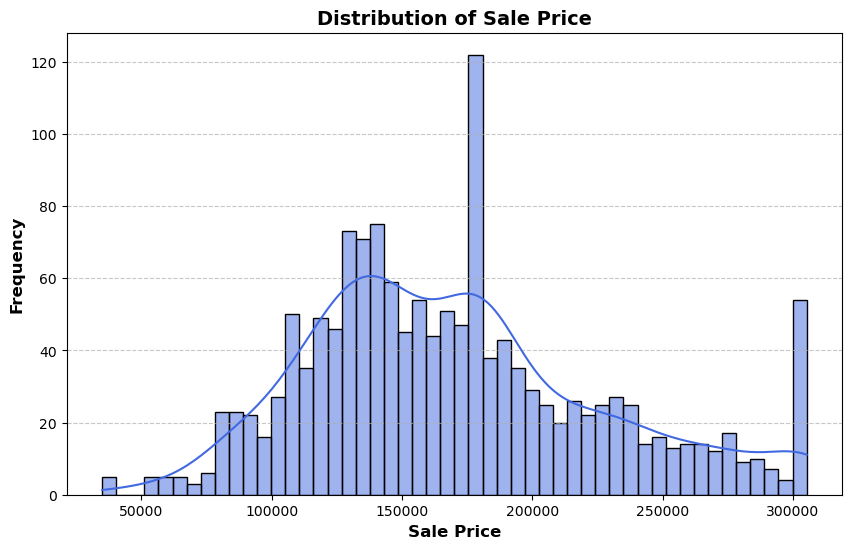

In [1507]:
plt.figure(figsize=(10, 6))  # Keep size for readability
sns.histplot(data=housing_data, x='SalePrice', bins=50, kde=True, color='royalblue') 

# Formatting labels and title
plt.xlabel('Sale Price', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Sale Price', fontsize=14, fontweight='bold')

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


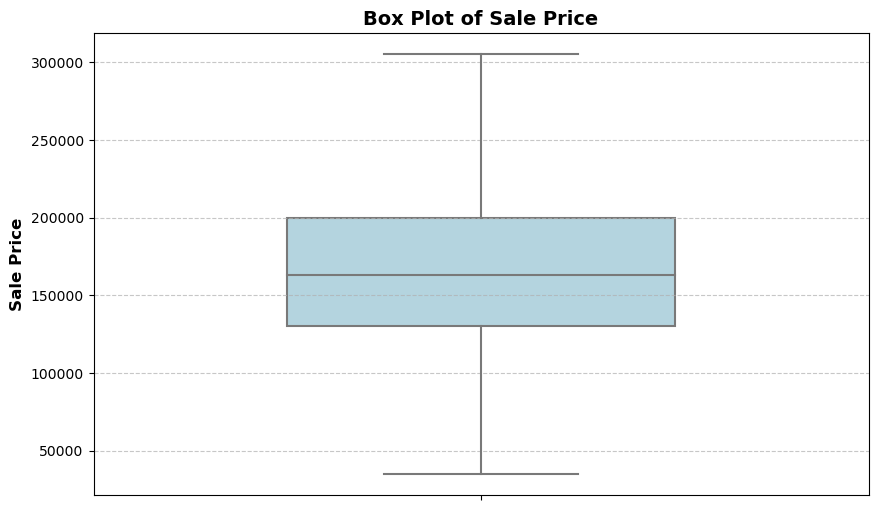

In [1508]:
plt.figure(figsize=(10, 6))  # Maintain size for visibility
sns.boxplot(data=housing_data, y='SalePrice', color='lightblue', width=0.5, fliersize=4)

# Formatting labels and title
plt.ylabel('Sale Price', fontsize=12, fontweight='bold')
plt.title('Box Plot of Sale Price', fontsize=14, fontweight='bold')

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


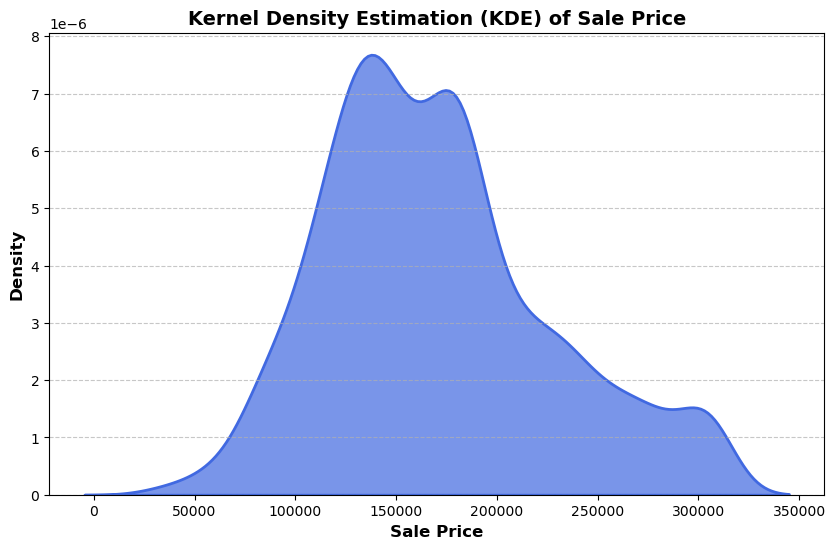

In [1509]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.kdeplot(data=housing_data['SalePrice'], fill=True, color='royalblue', alpha=0.7, linewidth=2)

# Formatting labels and title
plt.xlabel('Sale Price', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.title('Kernel Density Estimation (KDE) of Sale Price', fontsize=14, fontweight='bold')

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


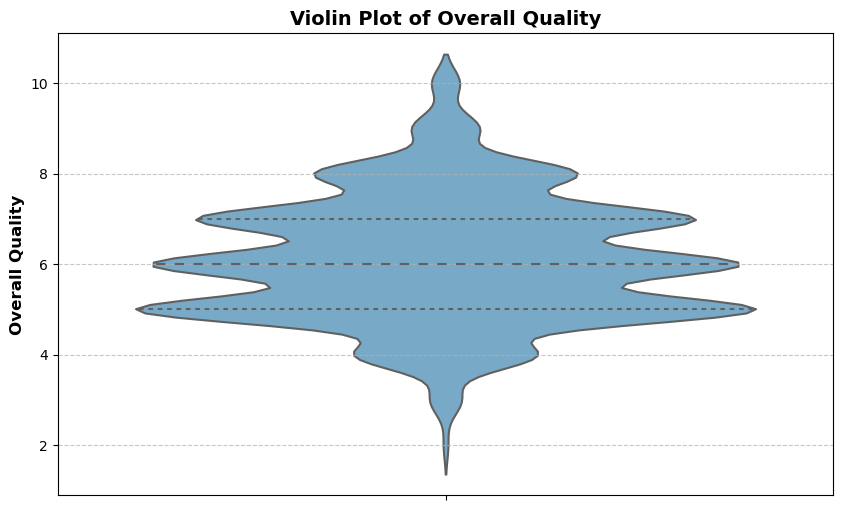

In [1510]:
plt.figure(figsize=(10, 6))  # Maintain a large figure size
sns.violinplot(data=housing_data, y='OverallQual', inner='quartile', palette='Blues')

# Formatting labels and title
plt.ylabel('Overall Quality', fontsize=12, fontweight='bold')
plt.title('Violin Plot of Overall Quality', fontsize=14, fontweight='bold')

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [1511]:
housing_data.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0   8450.0          7.0     5.000000     2003.0        2003.0   
1         80.0   9600.0          6.0     5.575342     1976.0        1976.0   
2         68.0  11250.0          7.0     5.000000     2001.0        2002.0   
3         60.0   9550.0          7.0     5.000000     1915.0        1970.0   
4         84.0  14260.0          8.0     5.000000     2000.0        2000.0   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  GarageArea  WoodDeckSF  \
0       196.0       706.0         0.0      150.0  ...       548.0         0.0   
1         0.0       978.0         0.0      284.0  ...       460.0       298.0   
2       162.0       486.0         0.0      434.0  ...       608.0         0.0   
3         0.0       216.0         0.0      540.0  ...       642.0         0.0   
4       265.0       655.0         0.0      490.0  ...       836.0       192.0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0         61.0        0.00000        0.0          0.0       0.0   
1          0.0        0.00000        0.0          0.0       0.0   
2         42.0        0.00000        0.0          0.0       0.0   
3         35.0       21.95411        0.0          0.0       0.0   
4         84.0        0.00000        0.0          0.0       0.0   

   miscellaneous_feature  YrSold  SalePrice  
0                    0.0  2008.0   208500.0  
1                    0.0  2007.0   181500.0  
2                    0.0  2008.0   223500.0  
3                    0.0  2006.0   140000.0  
4                    0.0  2008.0   250000.0  

[5 rows x 35 columns]

In [1512]:
exclude_housing_data=housing_data.select_dtypes(exclude=['object'])

In [1513]:
exclude_housing_data

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0   8450.0          7.0     5.000000     2003.0        2003.0   
1            80.0   9600.0          6.0     5.575342     1976.0        1976.0   
2            68.0  11250.0          7.0     5.000000     2001.0        2002.0   
3            60.0   9550.0          7.0     5.000000     1915.0        1970.0   
4            84.0  14260.0          8.0     5.000000     2000.0        2000.0   
...           ...      ...          ...          ...        ...           ...   
1455         62.0   7917.0          6.0     5.000000     1999.0        2000.0   
1456         85.0  13175.0          6.0     6.000000     1978.0        1988.0   
1457         66.0   9042.0          7.0     5.575342     1941.0        2006.0   
1458         68.0   9717.0          5.0     6.000000     1950.0        1996.0   
1459         75.0   9937.0          5.0     6.000000     1965.0        1965.0   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  GarageArea  \
0          196.0       706.0    0.000000      150.0  ...       548.0   
1            0.0       978.0    0.000000      284.0  ...       460.0   
2          162.0       486.0    0.000000      434.0  ...       608.0   
3            0.0       216.0    0.000000      540.0  ...       642.0   
4          265.0       655.0    0.000000      490.0  ...       836.0   
...          ...         ...         ...        ...  ...         ...   
1455         0.0         0.0    0.000000      953.0  ...       460.0   
1456       119.0       790.0   46.549315      589.0  ...       500.0   
1457         0.0       275.0    0.000000      877.0  ...       252.0   
1458         0.0        49.0   46.549315        0.0  ...       240.0   
1459         0.0       830.0   46.549315      136.0  ...       276.0   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0       0.000000         61.0        0.00000        0.0          0.0   
1     298.000000          0.0        0.00000        0.0          0.0   
2       0.000000         42.0        0.00000        0.0          0.0   
3       0.000000         35.0       21.95411        0.0          0.0   
4     192.000000         84.0        0.00000        0.0          0.0   
...          ...          ...            ...        ...          ...   
1455    0.000000         40.0        0.00000        0.0          0.0   
1456  349.000000          0.0        0.00000        0.0          0.0   
1457    0.000000         60.0        0.00000        0.0          0.0   
1458  366.000000          0.0       21.95411        0.0          0.0   
1459   94.244521         68.0        0.00000        0.0          0.0   

      PoolArea  miscellaneous_feature  YrSold  SalePrice  
0          0.0               0.000000  2008.0   208500.0  
1          0.0               0.000000  2007.0   181500.0  
2          0.0               0.000000  2008.0   223500.0  
3          0.0               0.000000  2006.0   140000.0  
4          0.0               0.000000  2008.0   250000.0  
...        ...                    ...     ...        ...  
1455       0.0               0.000000  2007.0   175000.0  
1456       0.0               0.000000  2010.0   210000.0  
1457       0.0              43.489041  2010.0   266500.0  
1458       0.0               0.000000  2010.0   142125.0  
1459       0.0               0.000000  2008.0   147500.0  

[1460 rows x 35 columns]

In [1514]:
exclude_housing_data.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'Low_quality_finished_square_feet', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'miscellaneous_feature', 'YrSold',
       'SalePrice'],
      dtype='object')

In [1515]:
corr_matrix = exclude_housing_data.corr()

In [1516]:
corr_matrix

LotFrontage   LotArea  OverallQual  \
LotFrontage                          1.000000  0.252492     0.157877   
LotArea                              0.252492  1.000000     0.235955   
OverallQual                          0.157877  0.235955     1.000000   
OverallCond                         -0.052545 -0.020774    -0.216323   
YearBuilt                            0.044972  0.103626     0.590075   
YearRemodAdd                         0.068039  0.072399     0.547279   
MasVnrArea                           0.067804  0.124036     0.340837   
BsmtFinSF1                          -0.009754  0.180457     0.200454   
BsmtFinSF2                          -0.037623  0.055898    -0.108031   
BsmtUnfSF                            0.166081  0.057787     0.244760   
TotalBsmtSF                          0.185082  0.339192     0.447303   
1stFlrSF                             0.209469  0.408620     0.434331   
2ndFlrSF                             0.018343  0.096947     0.282459   
Low_quality_finished_square_feet     0.004114 -0.035524    -0.029358   
GrLivArea                            0.150352  0.377333     0.553477   
BsmtFullBath                        -0.025323  0.087508     0.116618   
BsmtHalfBath                        -0.029885  0.039427    -0.044999   
FullBath                             0.105743  0.206984     0.545946   
HalfBath                            -0.019607  0.101661     0.277234   
BedroomAbvGr                         0.144500  0.322462     0.131703   
KitchenAbvGr                         0.042562 -0.015959    -0.188029   
TotRmsAbvGrd                         0.185871  0.378337     0.412952   
Fireplaces                           0.004467  0.304233     0.389268   
GarageYrBlt                          0.041362  0.002949     0.448739   
GarageCars                           0.168387  0.305140     0.608990   
GarageArea                           0.180758  0.324228     0.548566   
WoodDeckSF                           0.018839  0.168183     0.256550   
OpenPorchSF                          0.084692  0.150428     0.387304   
EnclosedPorch                        0.001660 -0.057523    -0.168995   
3SsnPorch                            0.019213  0.039742     0.025364   
ScreenPorch                          0.029874  0.080692     0.043770   
PoolArea                             0.003877  0.058803     0.074252   
miscellaneous_feature               -0.032880  0.049382    -0.090473   
YrSold                              -0.020426 -0.021967    -0.026898   
SalePrice                            0.124670  0.386049     0.724710   

                                  OverallCond  YearBuilt  YearRemodAdd  \
LotFrontage                         -0.052545   0.044972      0.068039   
LotArea                             -0.020774   0.103626      0.072399   
OverallQual                         -0.216323   0.590075      0.547279   
OverallCond                          1.000000  -0.400052     -0.100501   
YearBuilt                           -0.400052   1.000000      0.609084   
YearRemodAdd                        -0.100501   0.609084      1.000000   
MasVnrArea                          -0.151322   0.334128      0.159813   
BsmtFinSF1                          -0.041242   0.238585      0.119177   
BsmtFinSF2                           0.105716  -0.076757     -0.104958   
BsmtUnfSF                           -0.133340   0.115773      0.147431   
TotalBsmtSF                         -0.228741   0.411346      0.266204   
1stFlrSF                            -0.156357   0.291319      0.246941   
2ndFlrSF                            -0.048220   0.029841      0.138718   
Low_quality_finished_square_feet     0.046127  -0.163161     -0.053577   
GrLivArea                           -0.159384   0.254298      0.291500   
BsmtFullBath                        -0.037706   0.179414      0.119971   
BsmtHalfBath                         0.072871  -0.048054     -0.014557   
FullBath                            -0.265912   0.479575      0.439046   
HalfBath                           

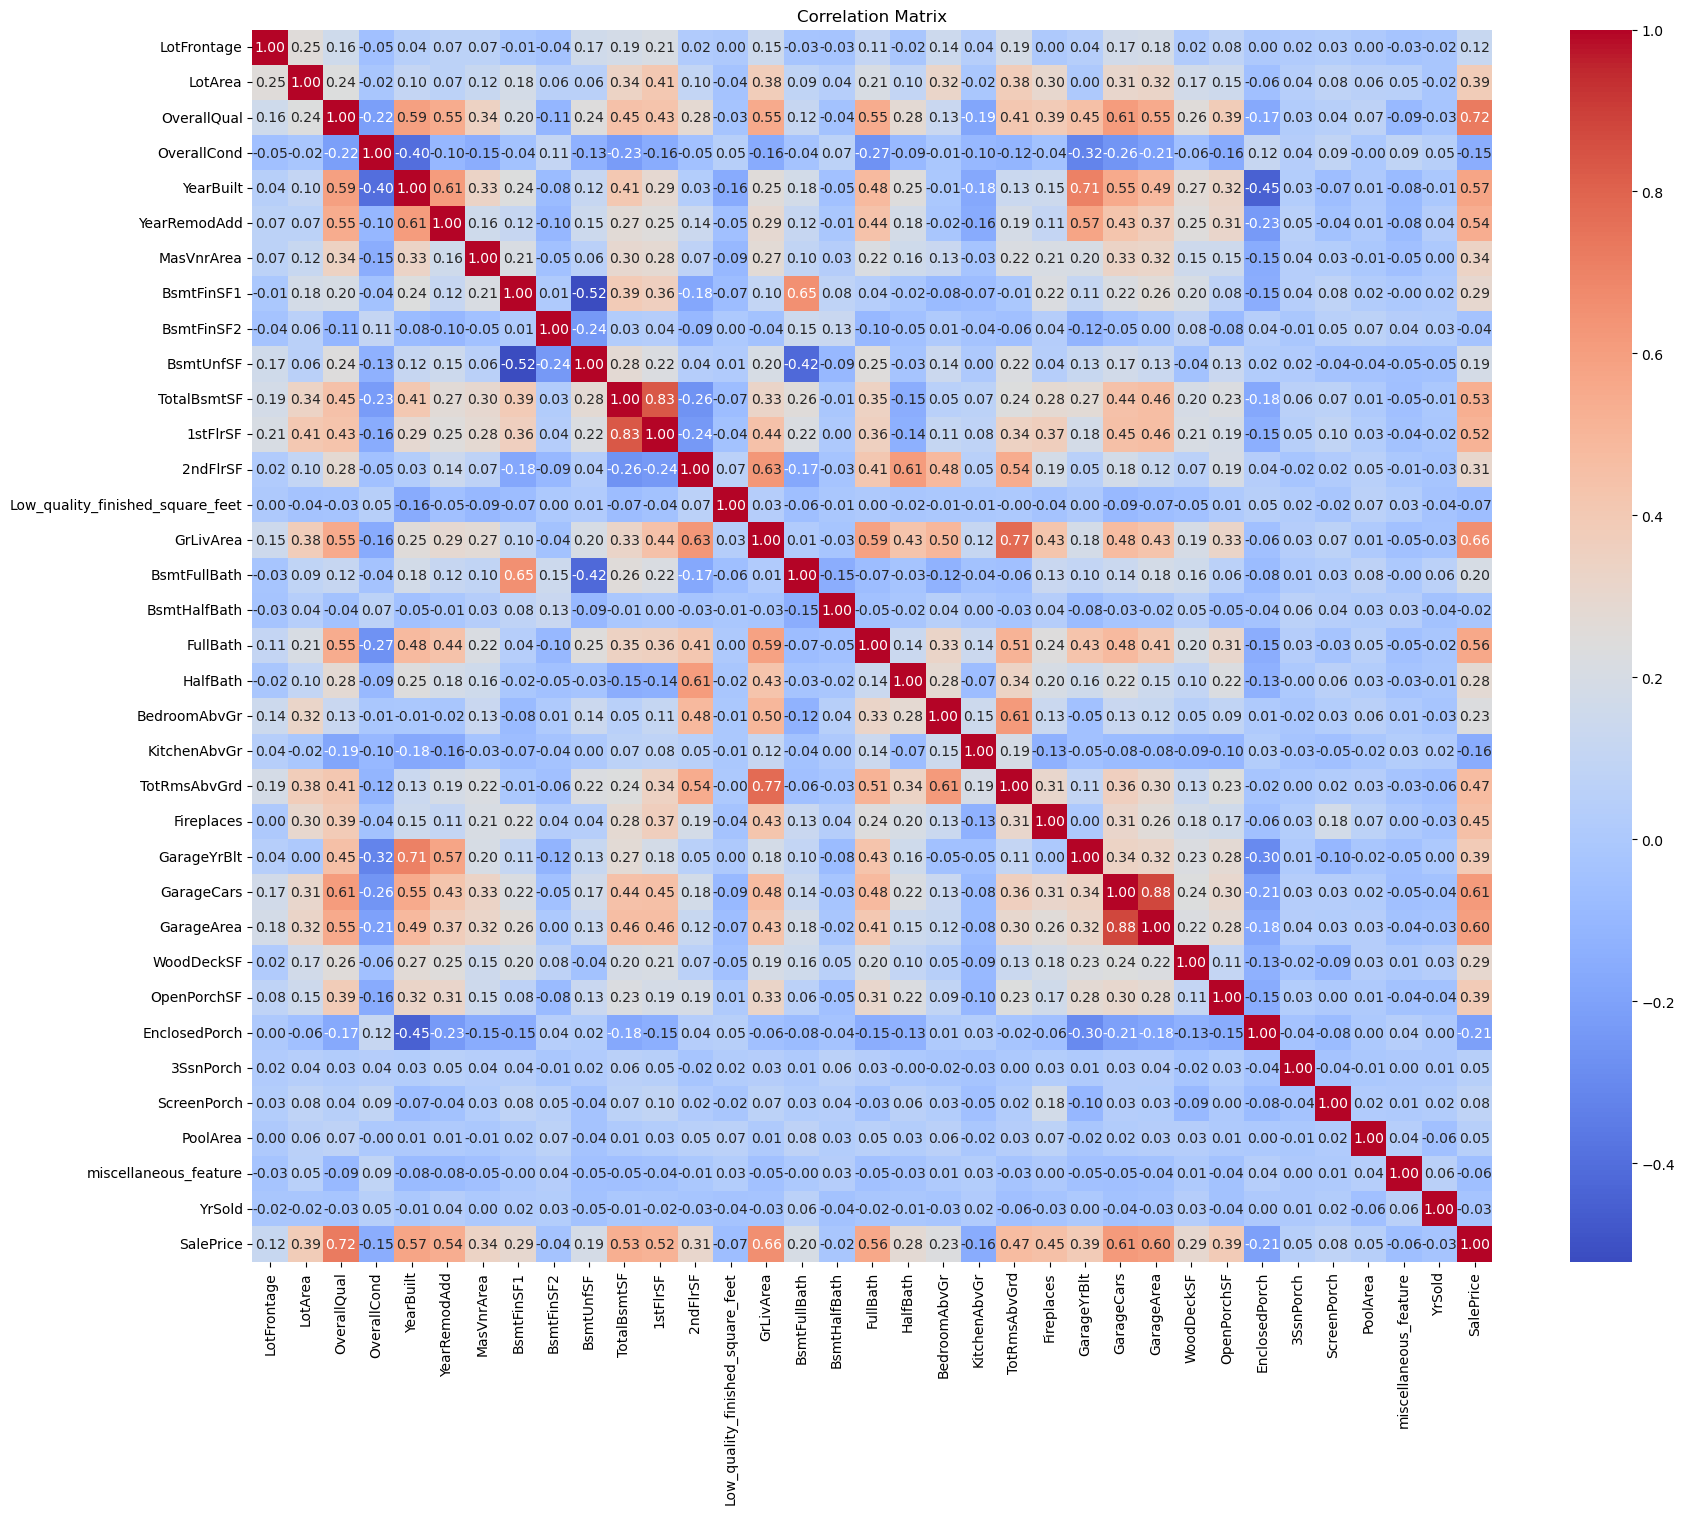

In [1517]:
# Heat-map:
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

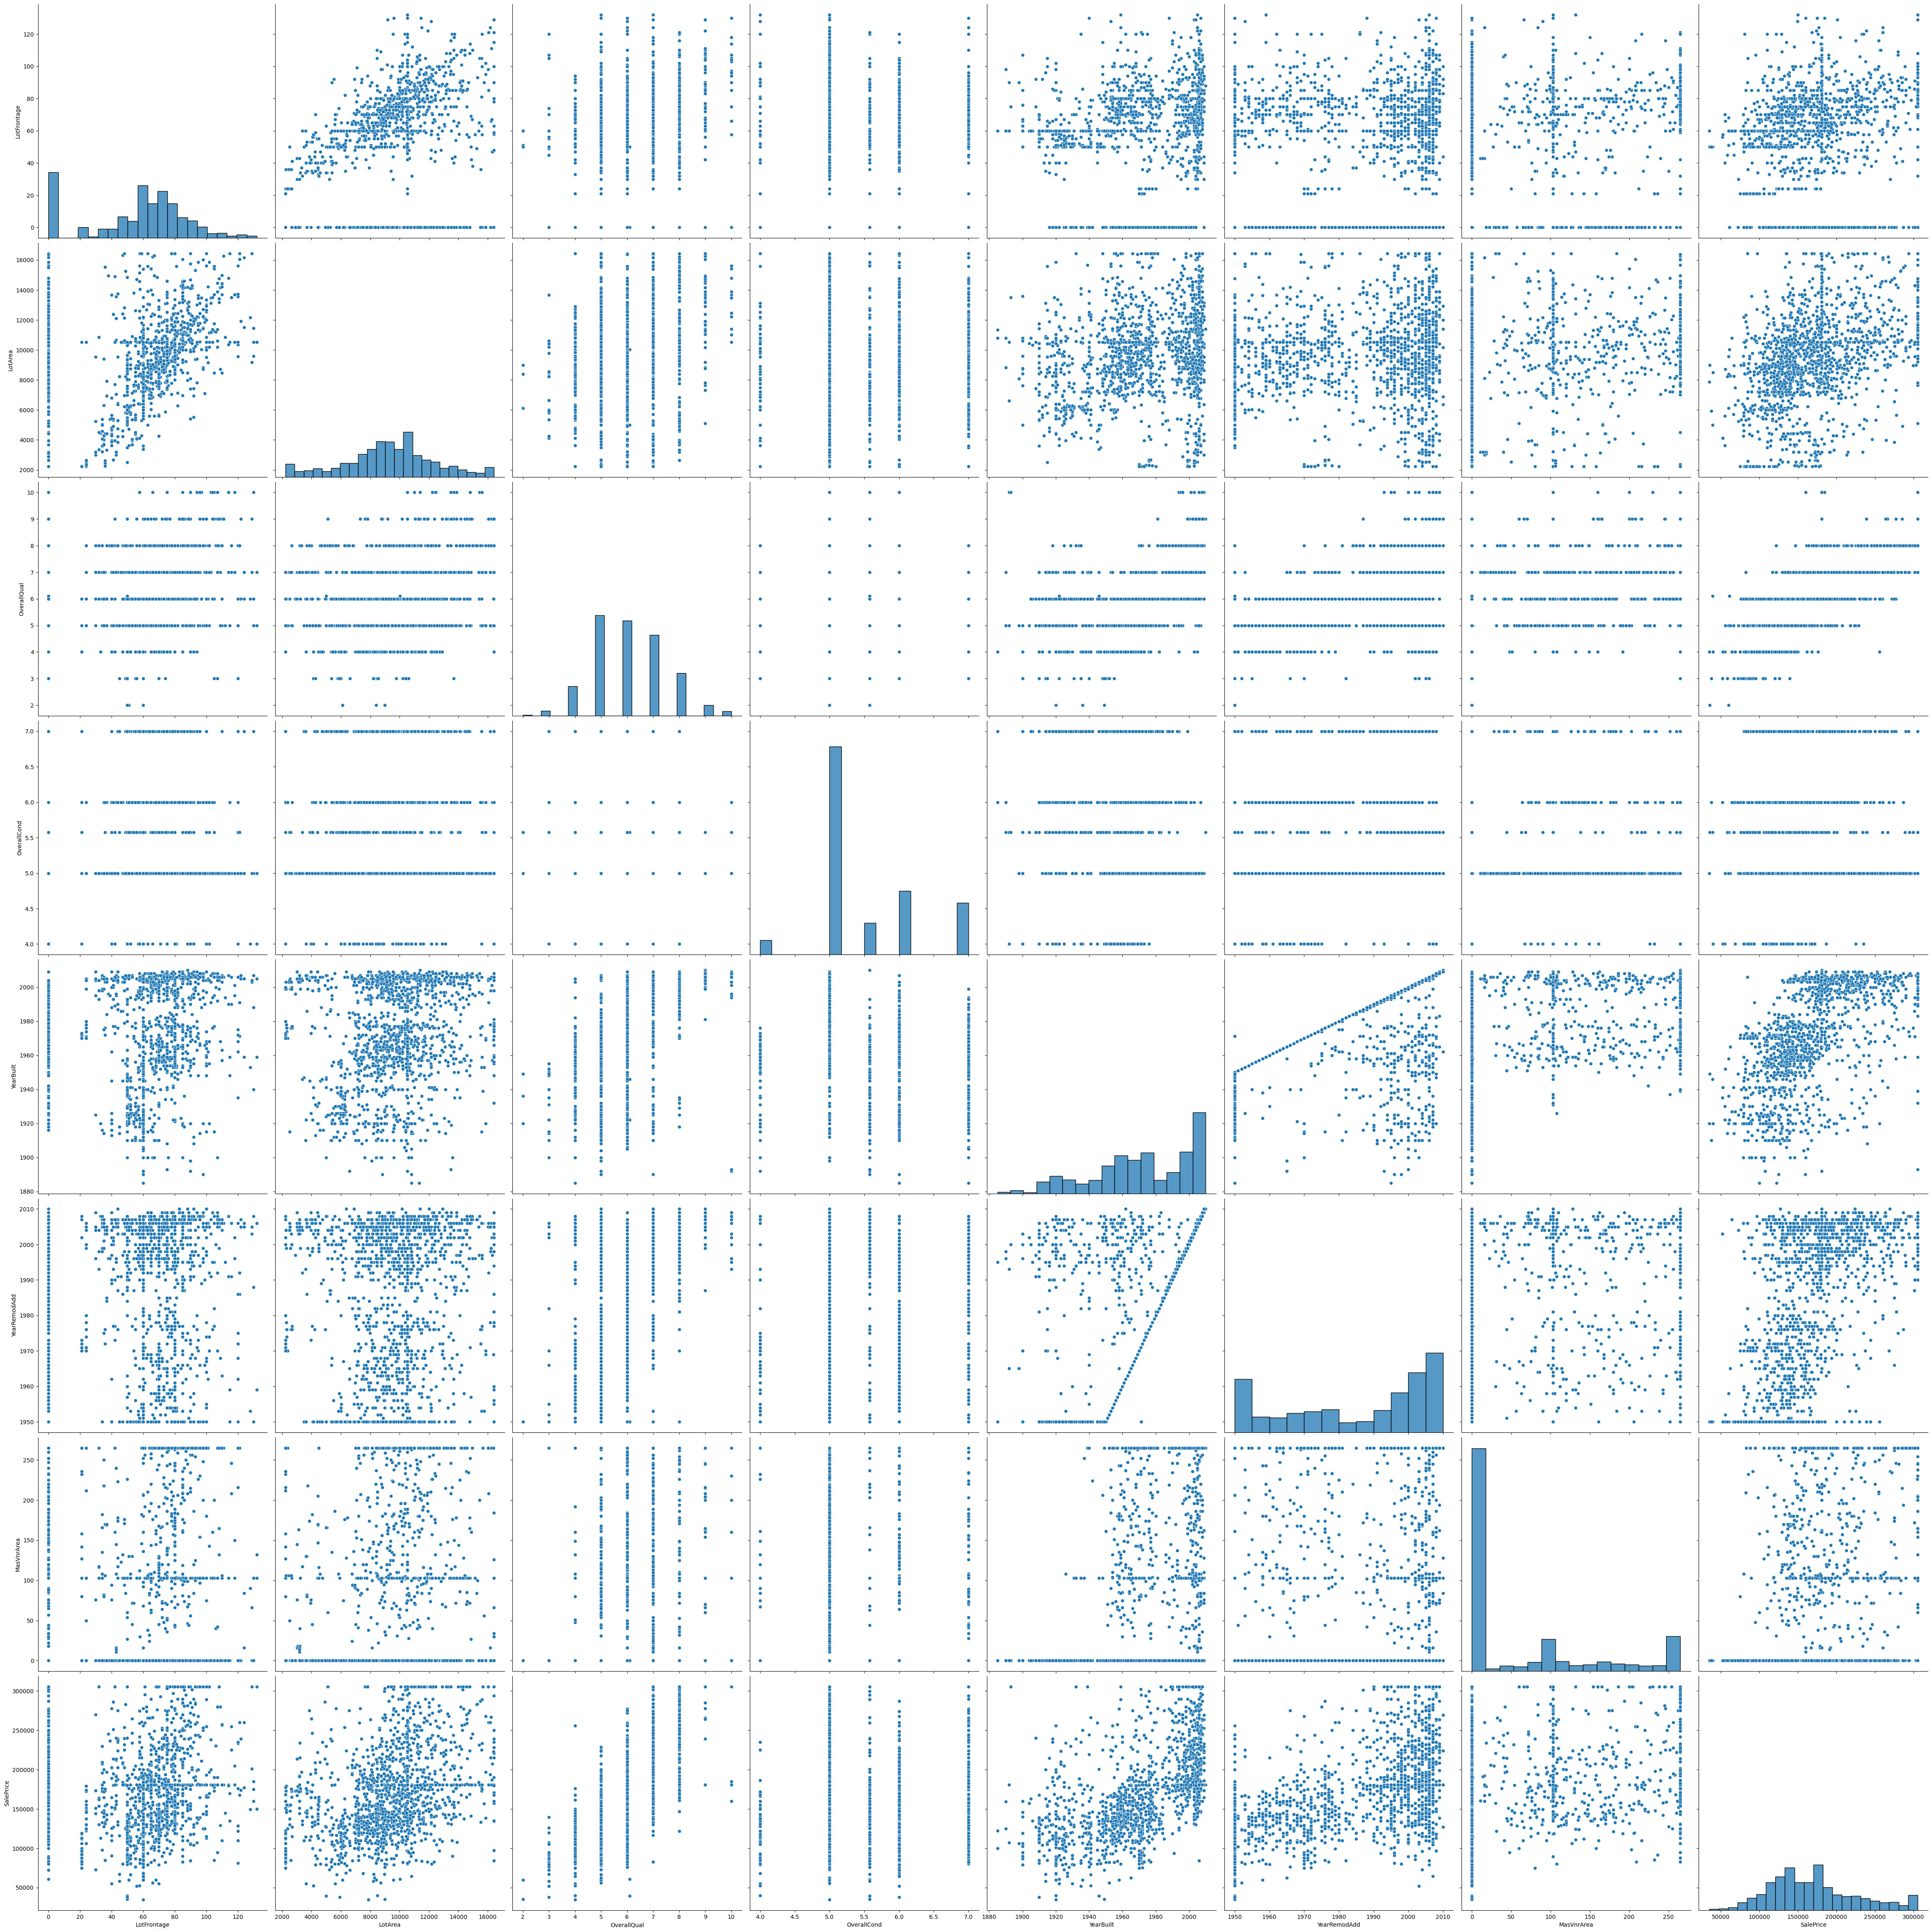

In [ ]:
# Pair-plot:
sns.pairplot(exclude_housing_data[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea','SalePrice']], height=6)
plt.show()

In [ ]:
# 5. Feature Engineering:
housing_data.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0   8450.0          7.0     5.000000     2003.0        2003.0   
1         80.0   9600.0          6.0     5.575342     1976.0        1976.0   
2         68.0  11250.0          7.0     5.000000     2001.0        2002.0   
3         60.0   9550.0          7.0     5.000000     1915.0        1970.0   
4         84.0  14260.0          8.0     5.000000     2000.0        2000.0   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  GarageArea  WoodDeckSF  \
0       196.0       706.0         0.0      150.0  ...       548.0         0.0   
1         0.0       978.0         0.0      284.0  ...       460.0       298.0   
2       162.0       486.0         0.0      434.0  ...       608.0         0.0   
3         0.0       216.0         0.0      540.0  ...       642.0         0.0   
4       265.0       655.0         0.0      490.0  ...       836.0       192.0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0         61.0        0.00000        0.0          0.0       0.0   
1          0.0        0.00000        0.0          0.0       0.0   
2         42.0        0.00000        0.0          0.0       0.0   
3         35.0       21.95411        0.0          0.0       0.0   
4         84.0        0.00000        0.0          0.0       0.0   

   miscellaneous_feature  YrSold  SalePrice  
0                    0.0  2008.0   208500.0  
1                    0.0  2007.0   181500.0  
2                    0.0  2008.0   223500.0  
3                    0.0  2006.0   140000.0  
4                    0.0  2008.0   250000.0  

[5 rows x 35 columns]

In [1520]:
housing_data.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'Low_quality_finished_square_feet', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'miscellaneous_feature', 'YrSold',
       'SalePrice'],
      dtype='object')

In [1521]:
housing_data.shape

(1460, 35)

In [1522]:
housing_data['PricePerSqFt'] = housing_data['SalePrice'] / (housing_data['GrLivArea'] + 
                                                            housing_data['TotalBsmtSF'])

In [1523]:
housing_data['PricePerSqFt']

0       81.254871
1       71.909667
2       82.594235
3       56.611403
4       74.783129
          ...    
1455    67.307692
1456    58.091286
1457    76.317297
1458    65.920686
1459    58.718153
Name: PricePerSqFt, Length: 1460, dtype: float64

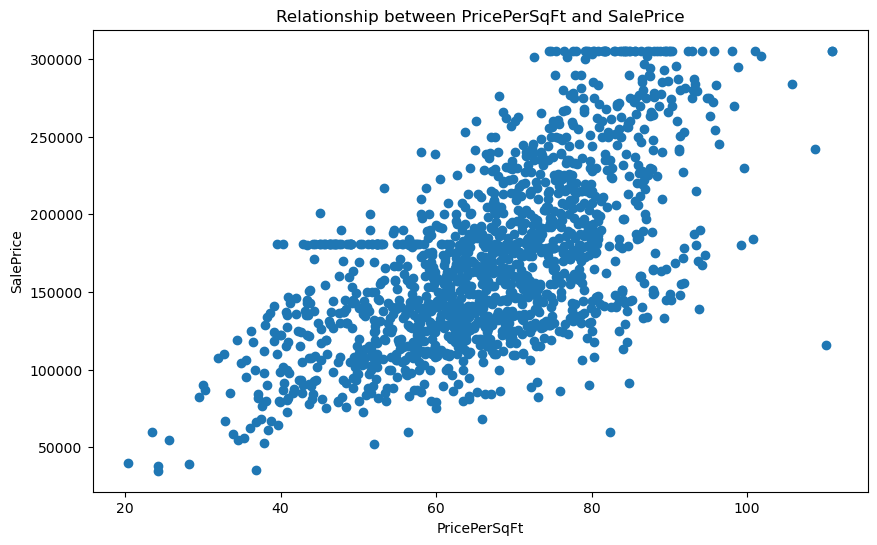

In [1524]:
plt.figure(figsize=(10, 6))
plt.scatter(housing_data['PricePerSqFt'],housing_data['SalePrice'])
plt.xlabel('PricePerSqFt')
plt.ylabel('SalePrice')
plt.title('Relationship between PricePerSqFt and SalePrice')
plt.show()

In [1525]:
housing_data['AgeAtSale'] = housing_data['YrSold'] - housing_data['YearBuilt']

In [1526]:
housing_data['AgeAtSale']

0        5.0
1       31.0
2        7.0
3       91.0
4        8.0
        ... 
1455     8.0
1456    32.0
1457    69.0
1458    60.0
1459    43.0
Name: AgeAtSale, Length: 1460, dtype: float64

In [1527]:
housing_data.drop(columns=['YearBuilt'],inplace=True)

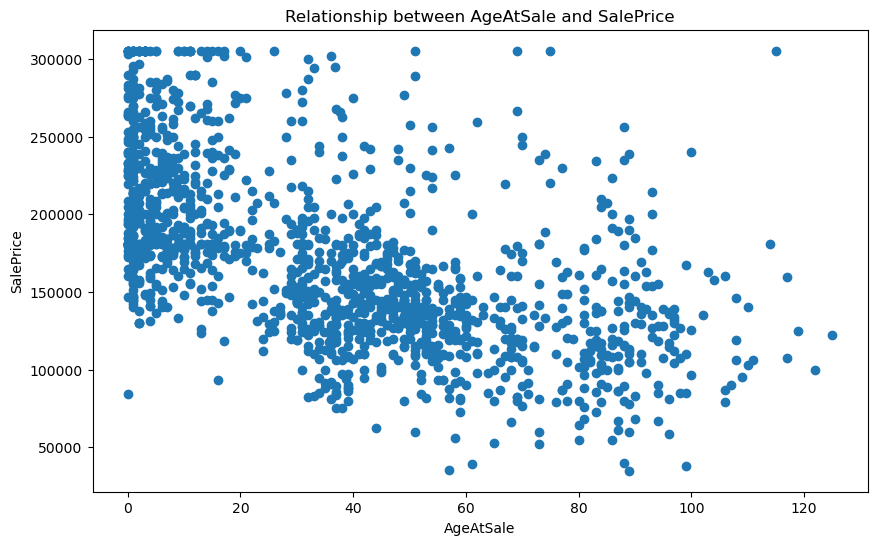

In [1528]:
plt.figure(figsize=(10, 6))
plt.scatter(housing_data['AgeAtSale'],housing_data['SalePrice'])
plt.xlabel('AgeAtSale')
plt.ylabel('SalePrice')
plt.title('Relationship between AgeAtSale and SalePrice')
plt.show()

In [1529]:
housing_data['TotalSqFt'] = housing_data['1stFlrSF'] + housing_data['2ndFlrSF'] + housing_data['TotalBsmtSF']

In [1530]:
housing_data['TotalSqFt']

0       2566.0
1       2524.0
2       2706.0
3       2473.0
4       3343.0
         ...  
1455    2600.0
1456    3615.0
1457    3492.0
1458    2156.0
1459    2512.0
Name: TotalSqFt, Length: 1460, dtype: float64

In [1531]:
housing_data['TotalBathrooms'] = housing_data['FullBath'] + 0.5 * housing_data['HalfBath']
+ housing_data['BsmtFullBath'] + 0.5 * housing_data['BsmtHalfBath']

0       1.000000
1       0.028767
2       1.000000
3       1.000000
4       1.000000
          ...   
1455    0.000000
1456    1.000000
1457    0.000000
1458    1.000000
1459    1.000000
Length: 1460, dtype: float64

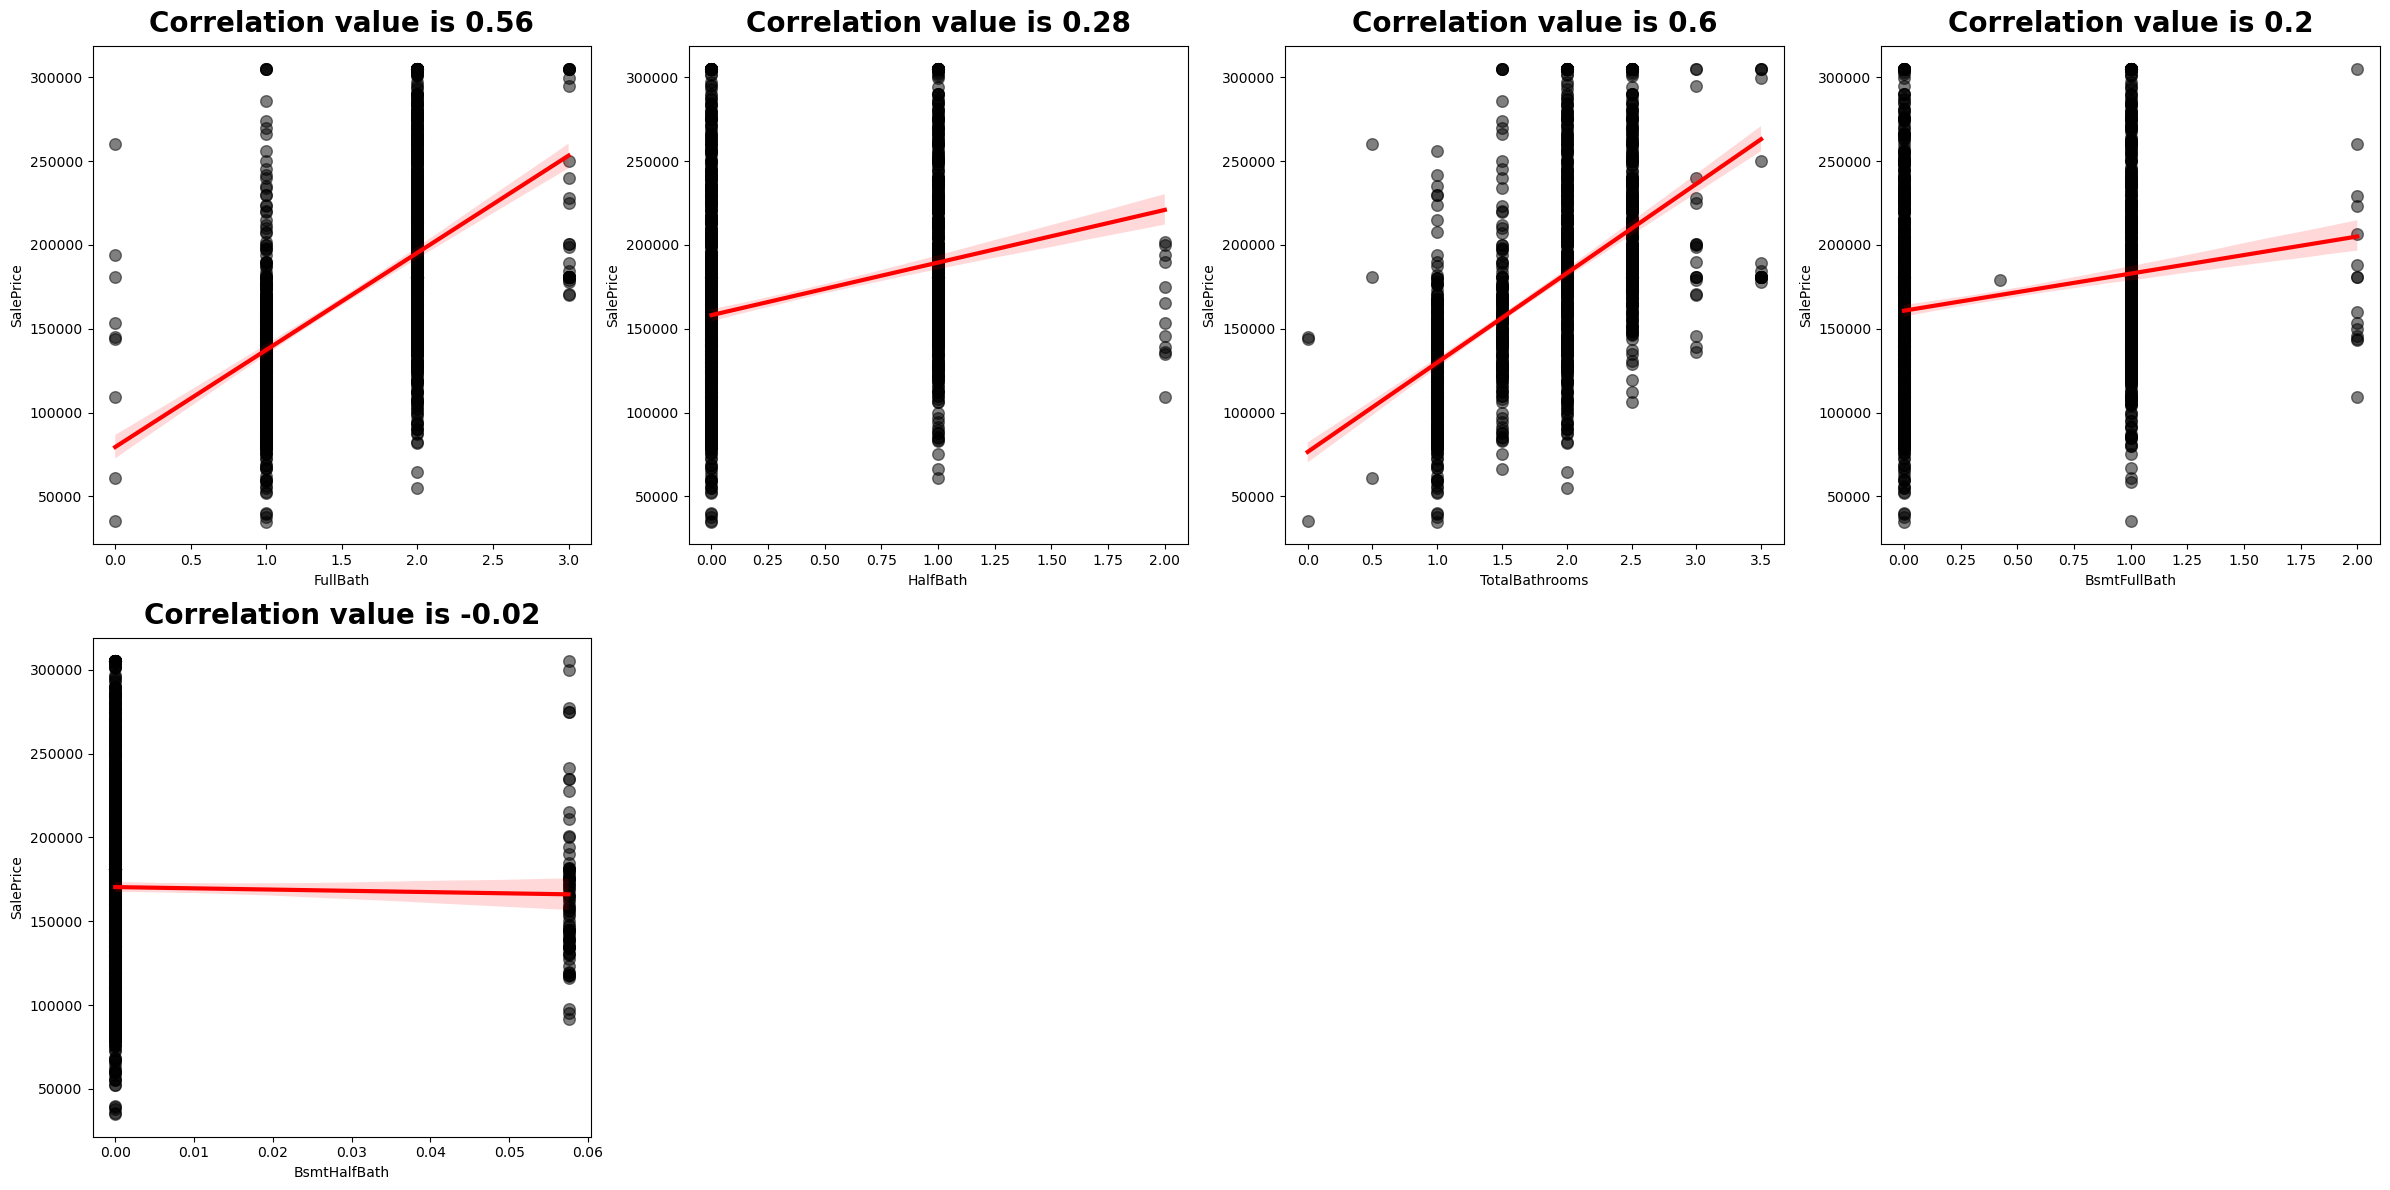

In [1532]:
cols = ['FullBath', 'HalfBath','TotalBathrooms', 'BsmtFullBath', 'BsmtHalfBath']

plt.figure(figsize=(24, 12))
for index, column in enumerate(cols):
    plt.subplot(2, 4, index + 1)
    sns.regplot(x=housing_data[column], y=housing_data["SalePrice"], color="black",
                scatter_kws={'s': 70, 'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3})
    corr = round(housing_data[[column, "SalePrice"]].corr()["SalePrice"][0], 2)
    plt.title(f"Correlation value is {corr}", pad=10, size=20, fontweight="black")
plt.tight_layout()
plt.show()

In [1533]:
housing_data.drop(columns=['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath'],inplace=True)

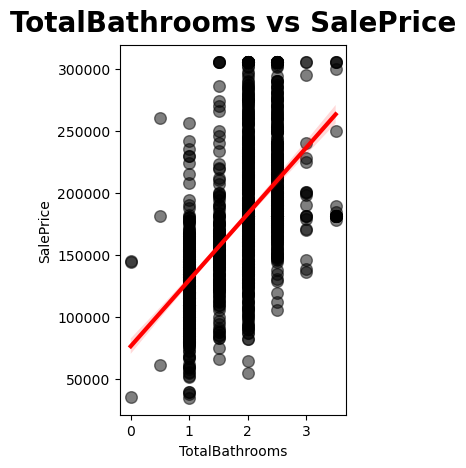

In [1534]:
plt.subplot(1, 2, 2)
sns.regplot(x=housing_data["TotalBathrooms"], y=housing_data["SalePrice"], color="black",
            scatter_kws={'s': 70, 'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3})
plt.title("TotalBathrooms vs SalePrice", pad=10, size=20, fontweight="black")
plt.show()

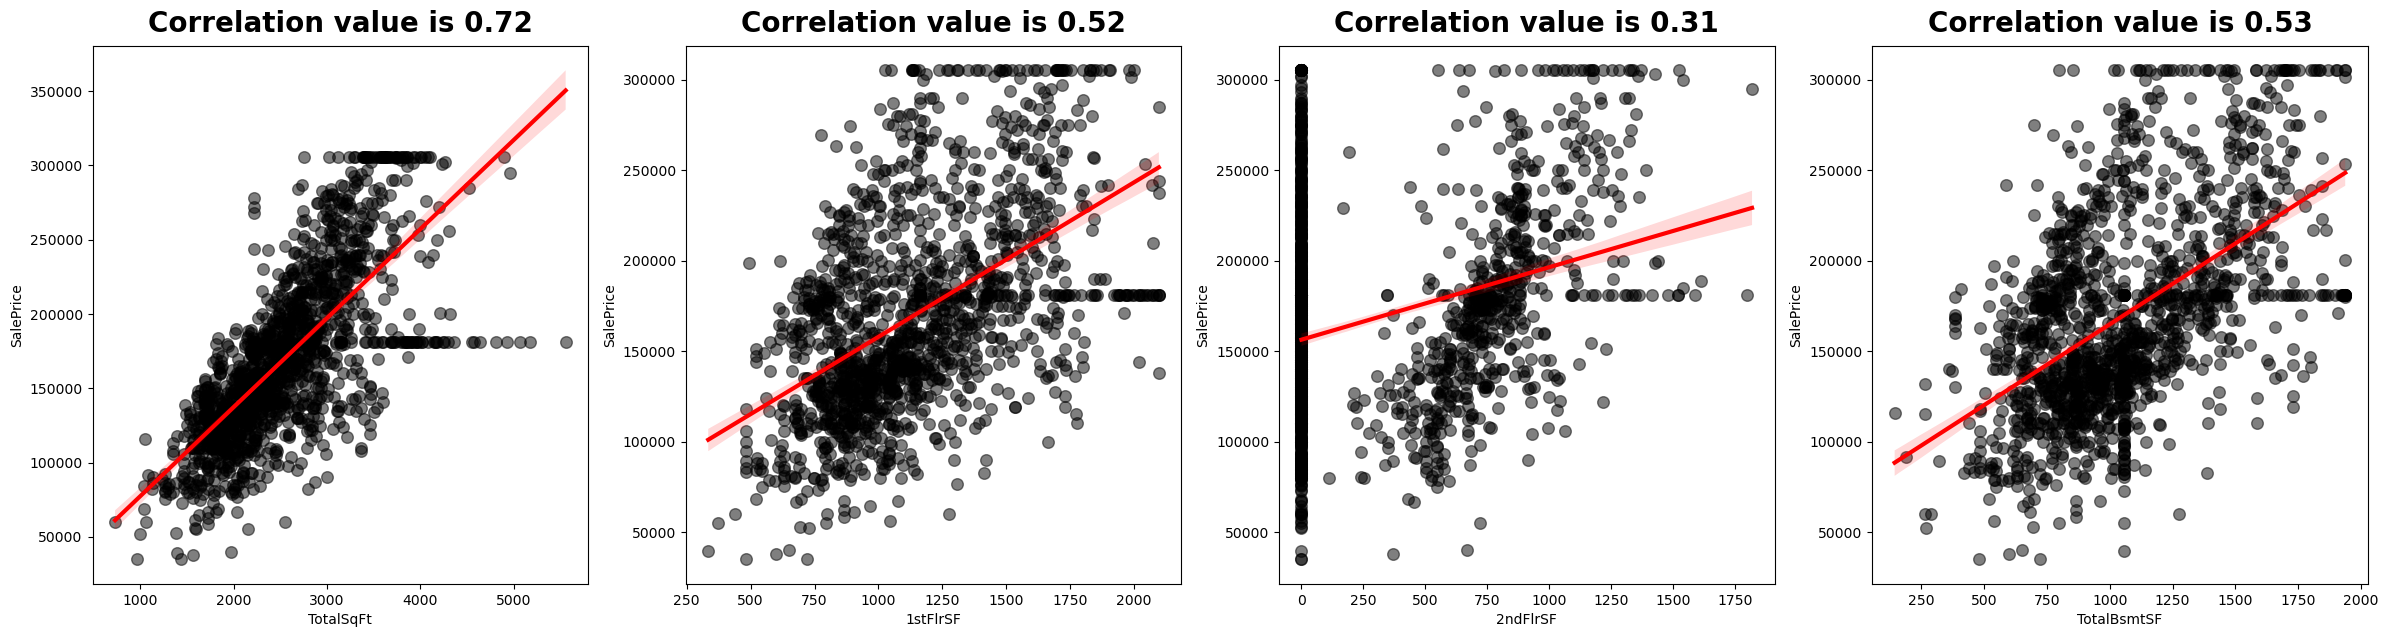

In [1535]:
cols = ['TotalSqFt', '1stFlrSF','2ndFlrSF', 'TotalBsmtSF']

plt.figure(figsize=(24, 12))
for index, column in enumerate(cols):
    plt.subplot(2, 4, index + 1)
    sns.regplot(x=housing_data[column], y=housing_data["SalePrice"], color="black",
                scatter_kws={'s': 70, 'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3})
    corr = round(housing_data[[column, "SalePrice"]].corr()["SalePrice"][0], 2)
    plt.title(f"Correlation value is {corr}", pad=10, size=20, fontweight="black")
plt.tight_layout()
plt.show()

In [1536]:
housing_data.drop(columns=['2ndFlrSF'],inplace=True)

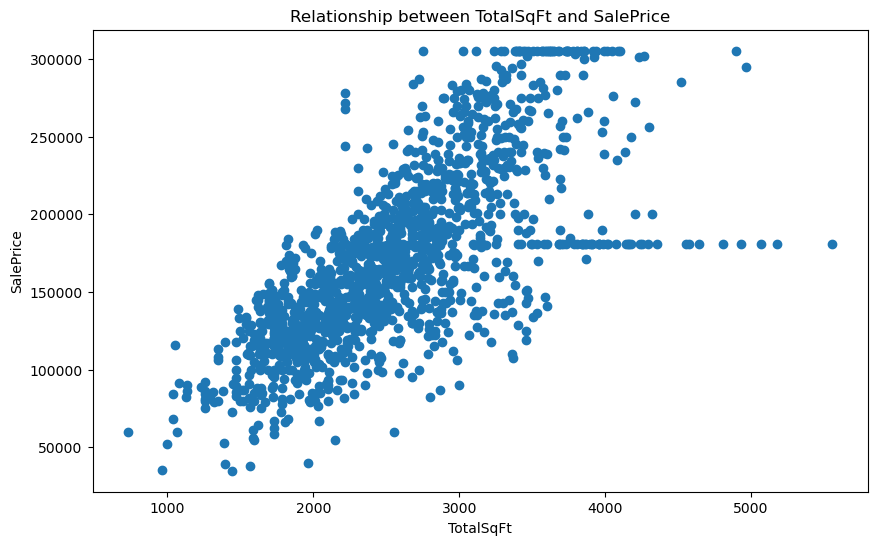

In [1537]:
plt.figure(figsize=(10, 6))
plt.scatter(housing_data['TotalSqFt'],housing_data['SalePrice'])
plt.xlabel('TotalSqFt')
plt.ylabel('SalePrice')
plt.title('Relationship between TotalSqFt and SalePrice')
plt.show()

In [1538]:
housing_data['TotalPorchArea'] = housing_data['OpenPorchSF'] + housing_data['EnclosedPorch'] + housing_data['3SsnPorch'] + housing_data['ScreenPorch']

In [1539]:
housing_data['TotalPorchArea']

0       61.00000
1        0.00000
2       42.00000
3       56.95411
4       84.00000
          ...   
1455    40.00000
1456     0.00000
1457    60.00000
1458    21.95411
1459    68.00000
Name: TotalPorchArea, Length: 1460, dtype: float64

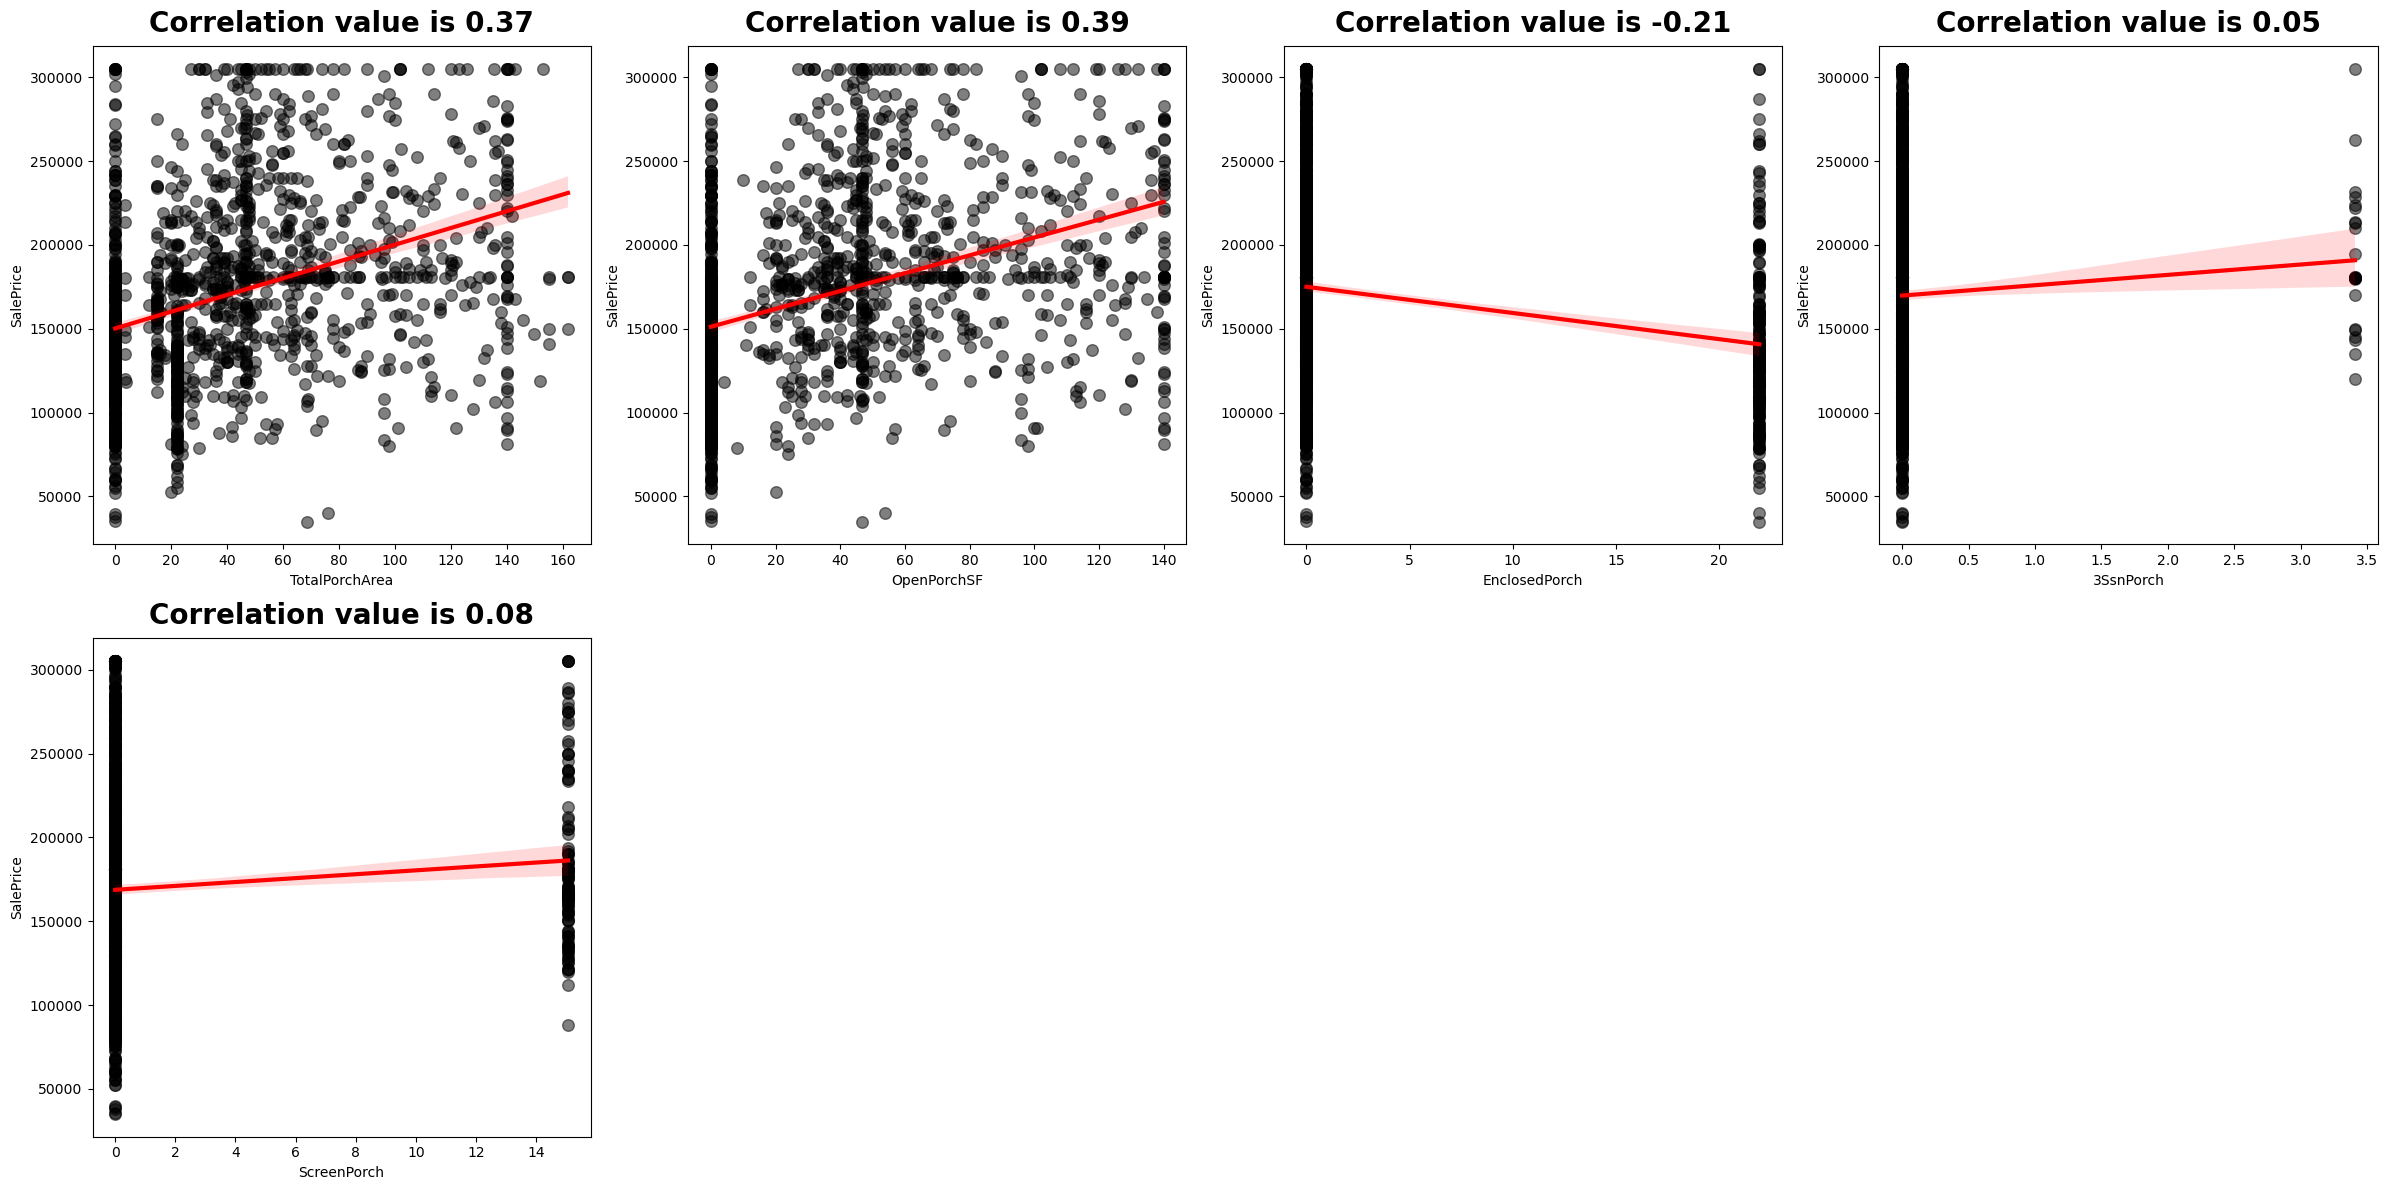

In [1540]:
cols = ['TotalPorchArea', 'OpenPorchSF','EnclosedPorch', '3SsnPorch','ScreenPorch']

plt.figure(figsize=(24, 12))
for index, column in enumerate(cols):
    plt.subplot(2, 4, index + 1)
    sns.regplot(x=housing_data[column], y=housing_data["SalePrice"], color="black",
                scatter_kws={'s': 70, 'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3})
    corr = round(housing_data[[column, "SalePrice"]].corr()["SalePrice"][0], 2)
    plt.title(f"Correlation value is {corr}", pad=10, size=20, fontweight="black")
plt.tight_layout()
plt.show()

In [1541]:
housing_data.drop(columns=['ScreenPorch','3SsnPorch','EnclosedPorch'],inplace=True)

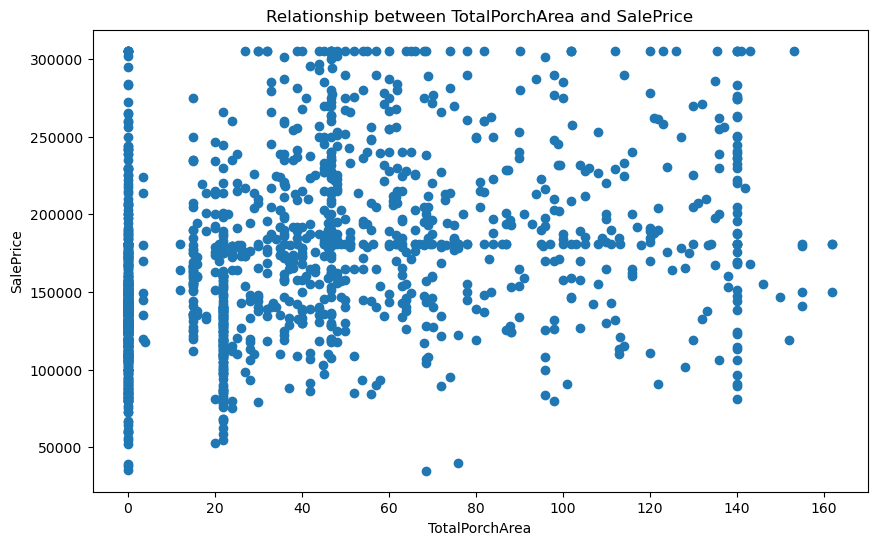

In [1542]:
plt.figure(figsize=(10, 6))
plt.scatter(housing_data['TotalPorchArea'],housing_data['SalePrice'])
plt.xlabel('TotalPorchArea')
plt.ylabel('SalePrice')
plt.title('Relationship between TotalPorchArea and SalePrice')
plt.show()

In [1543]:
housing_data['TotalFinishedSqFt'] = housing_data['BsmtFinSF1'] + housing_data['BsmtFinSF2'] + housing_data['GrLivArea']

In [1544]:
housing_data['TotalFinishedSqFt']

0       2416.000000
1       2240.000000
2       2272.000000
3       1933.000000
4       2853.000000
           ...     
1455    1647.000000
1456    2909.549315
1457    2615.000000
1458    1173.549315
1459    2132.549315
Name: TotalFinishedSqFt, Length: 1460, dtype: float64

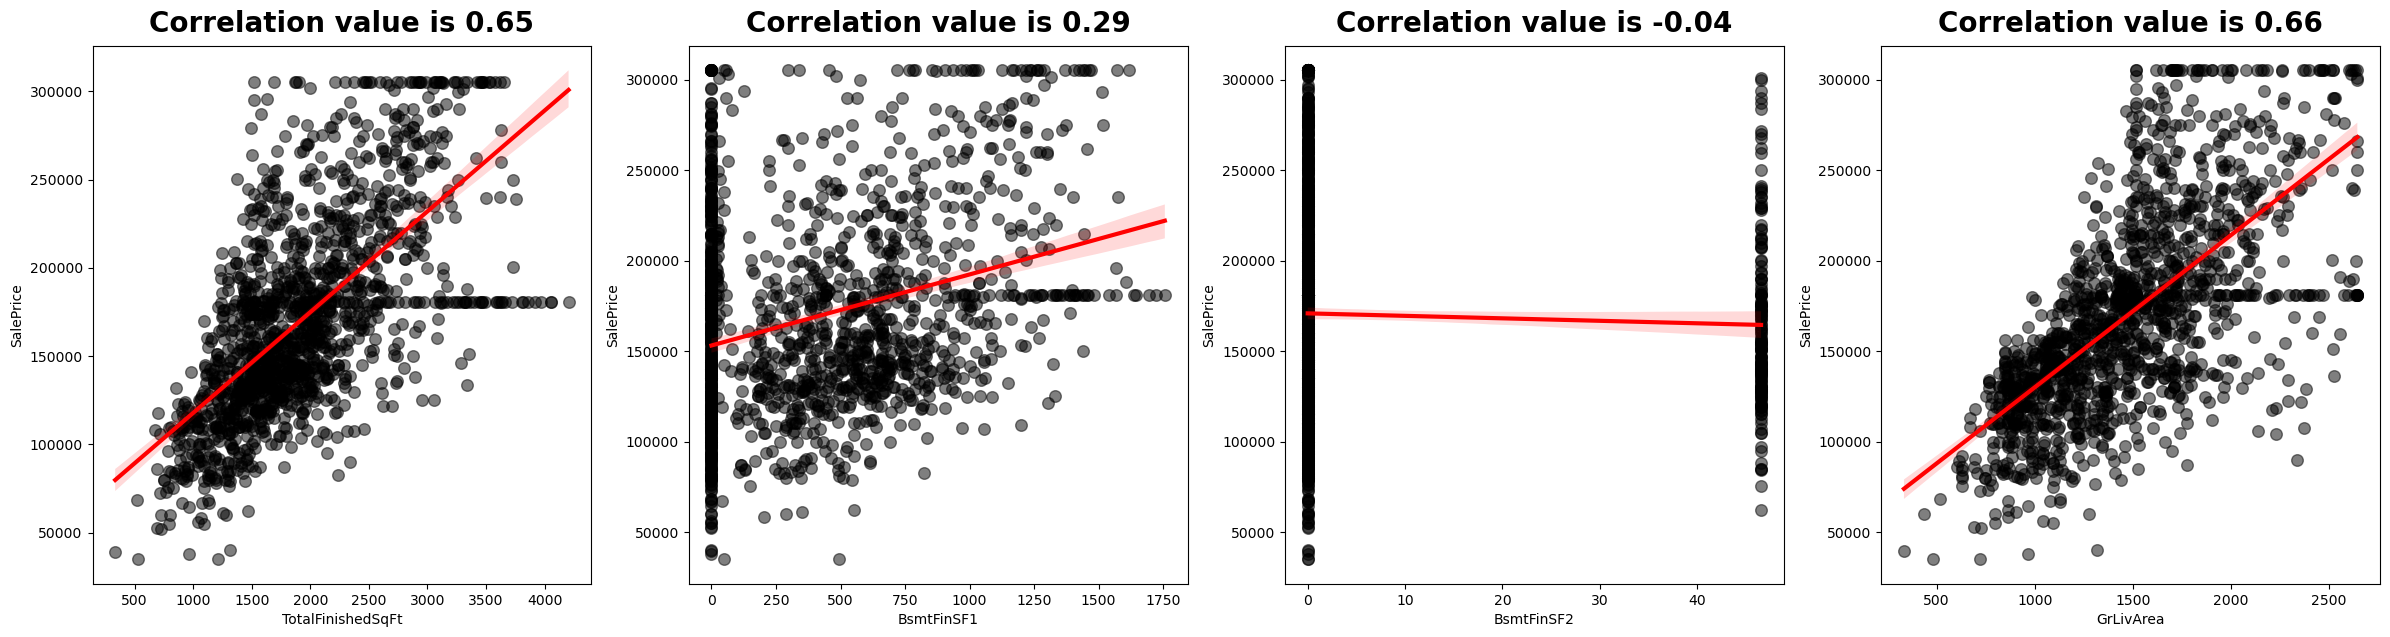

In [1545]:
cols = ['TotalFinishedSqFt', 'BsmtFinSF1','BsmtFinSF2', 'GrLivArea']

plt.figure(figsize=(24, 12))
for index, column in enumerate(cols):
    plt.subplot(2, 4, index + 1)
    sns.regplot(x=housing_data[column], y=housing_data["SalePrice"], color="black",
                scatter_kws={'s': 70, 'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3})
    corr = round(housing_data[[column, "SalePrice"]].corr()["SalePrice"][0], 2)
    plt.title(f"Correlation value is {corr}", pad=10, size=20, fontweight="black")
plt.tight_layout()
plt.show()

In [1546]:
housing_data.drop(columns=['BsmtFinSF2','BsmtFinSF1'],inplace=True)

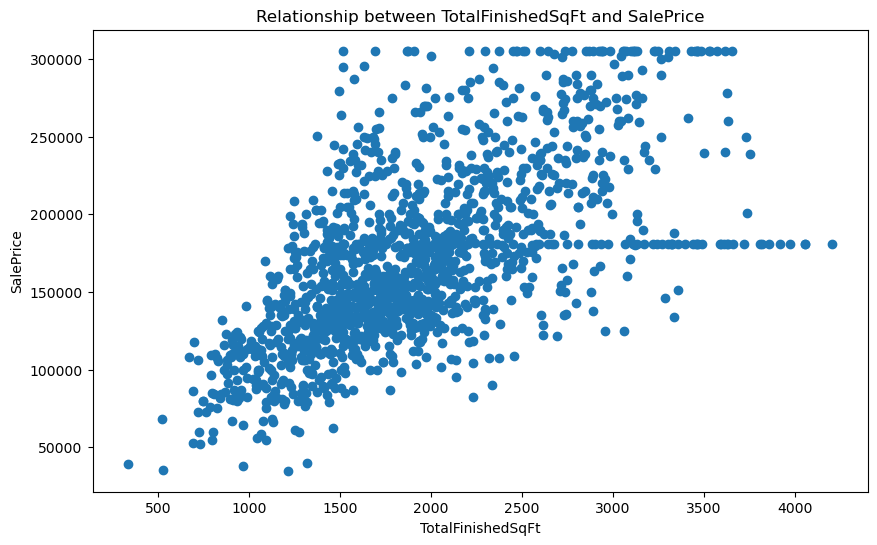

In [1547]:
plt.figure(figsize=(10, 6))
plt.scatter(housing_data['TotalFinishedSqFt'],housing_data['SalePrice'])
plt.xlabel('TotalFinishedSqFt')
plt.ylabel('SalePrice')
plt.title('Relationship between TotalFinishedSqFt and SalePrice')
plt.show()

In [1548]:
housing_data['TotalQualityScore'] = housing_data['OverallQual'] + housing_data['OverallCond']

In [1549]:
housing_data['TotalQualityScore']

0       12.000000
1       11.575342
2       12.000000
3       12.000000
4       13.000000
          ...    
1455    11.000000
1456    12.000000
1457    12.575342
1458    11.000000
1459    11.000000
Name: TotalQualityScore, Length: 1460, dtype: float64

In [1550]:
housing_data['TotalGarageScore'] = housing_data['GarageCars'] * housing_data['GarageArea']

In [1551]:
housing_data['TotalGarageScore']

0       1096.0
1        920.0
2       1216.0
3       1926.0
4       2508.0
         ...  
1455     920.0
1456    1000.0
1457     252.0
1458     240.0
1459     276.0
Name: TotalGarageScore, Length: 1460, dtype: float64

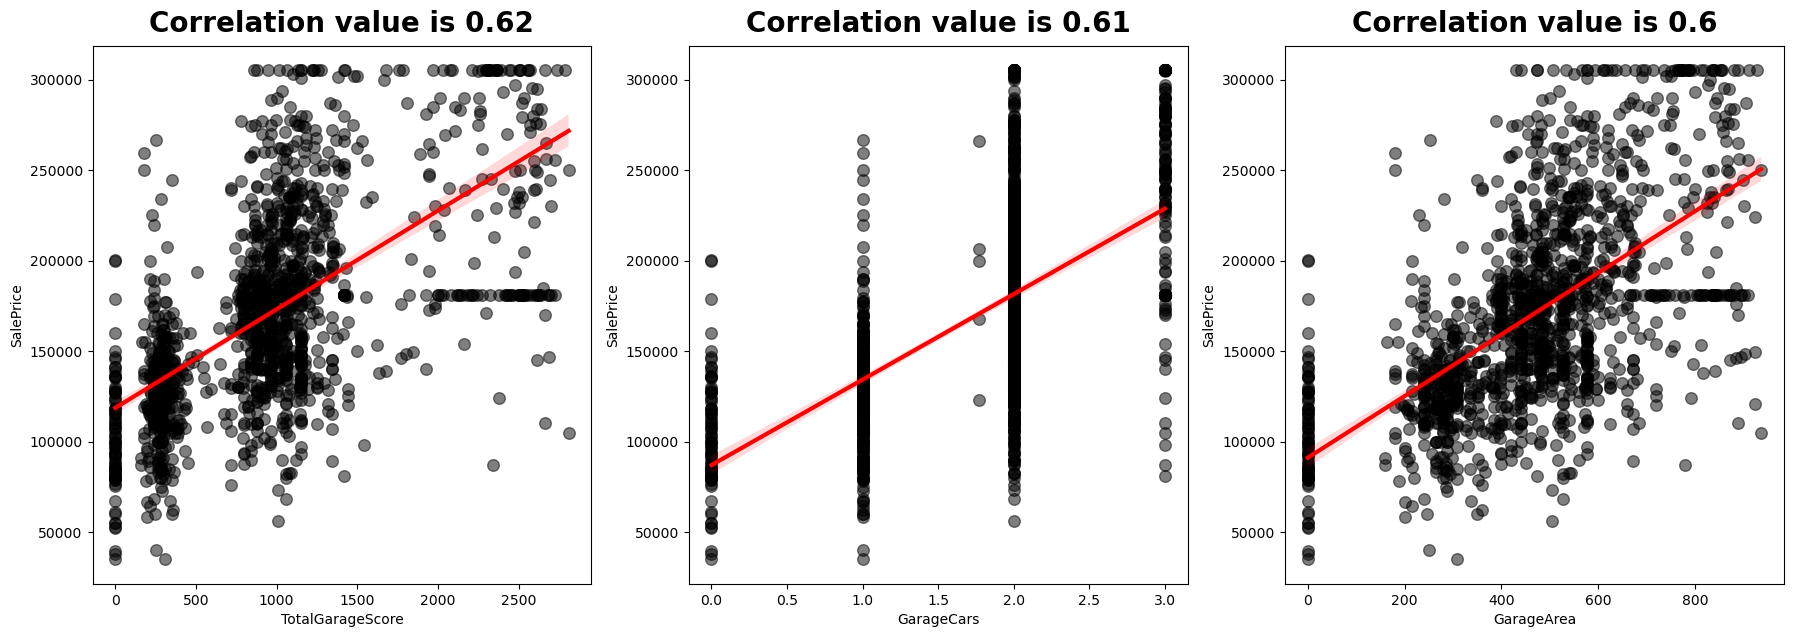

In [1552]:
cols = ['TotalGarageScore', 'GarageCars','GarageArea']
plt.figure(figsize=(24, 12))
for index, column in enumerate(cols):
    plt.subplot(2, 4, index + 1)
    sns.regplot(x=housing_data[column], y=housing_data["SalePrice"], color="black",
                scatter_kws={'s': 70, 'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3})
    corr = round(housing_data[[column, "SalePrice"]].corr()["SalePrice"][0], 2)
    plt.title(f"Correlation value is {corr}", pad=10, size=20, fontweight="black")
plt.tight_layout()
plt.show()

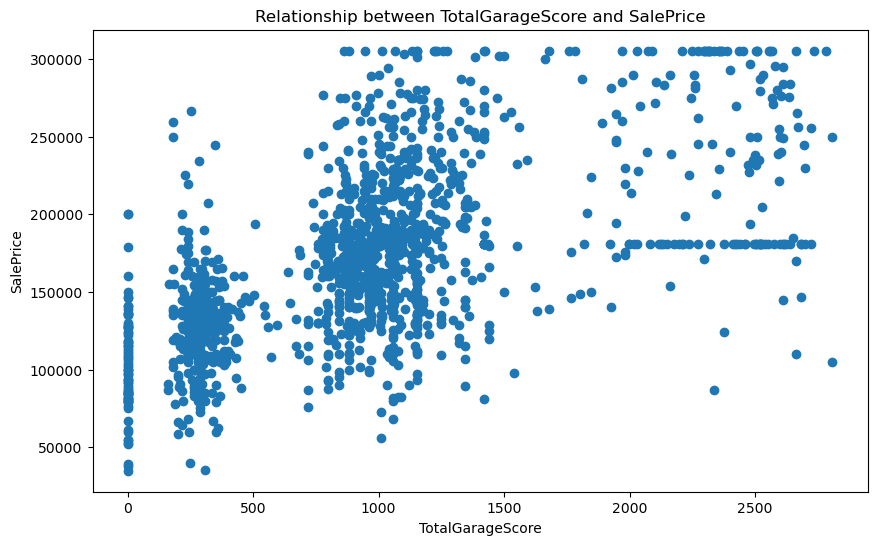

In [1553]:
plt.figure(figsize=(10, 6))
plt.scatter(housing_data['TotalGarageScore'],housing_data['SalePrice'])
plt.xlabel('TotalGarageScore')
plt.ylabel('SalePrice')
plt.title('Relationship between TotalGarageScore and SalePrice')
plt.show()

In [1554]:
housing_data['TotalOutdoorArea'] = housing_data['WoodDeckSF'] + housing_data['OpenPorchSF'] +housing_data['PoolArea']

In [1555]:
housing_data['TotalOutdoorArea']

0        61.000000
1       298.000000
2        42.000000
3        35.000000
4       276.000000
           ...    
1455     40.000000
1456    349.000000
1457     60.000000
1458    366.000000
1459    162.244521
Name: TotalOutdoorArea, Length: 1460, dtype: float64

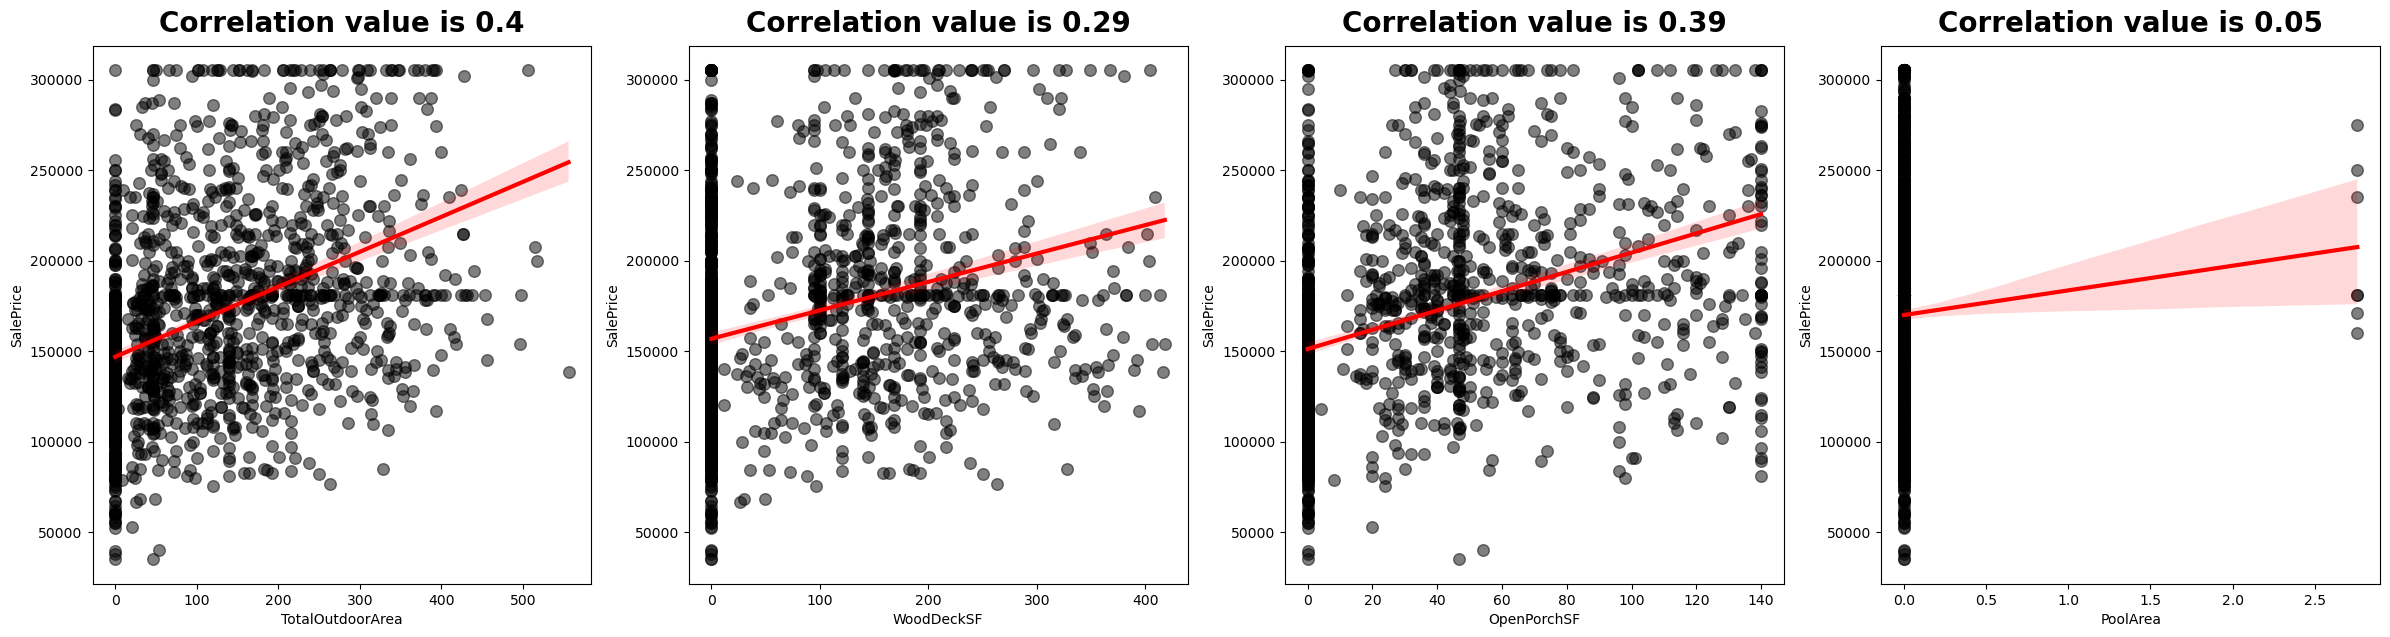

In [1556]:
cols = ['TotalOutdoorArea', 'WoodDeckSF','OpenPorchSF','PoolArea']
plt.figure(figsize=(24, 12))
for index, column in enumerate(cols):
    plt.subplot(2, 4, index + 1)
    sns.regplot(x=housing_data[column], y=housing_data["SalePrice"], color="black",
                scatter_kws={'s': 70, 'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3})
    corr = round(housing_data[[column, "SalePrice"]].corr()["SalePrice"][0], 2)
    plt.title(f"Correlation value is {corr}", pad=10, size=20, fontweight="black")
plt.tight_layout()
plt.show()

In [1557]:
housing_data.drop(columns=['WoodDeckSF','OpenPorchSF','PoolArea'],inplace=True)

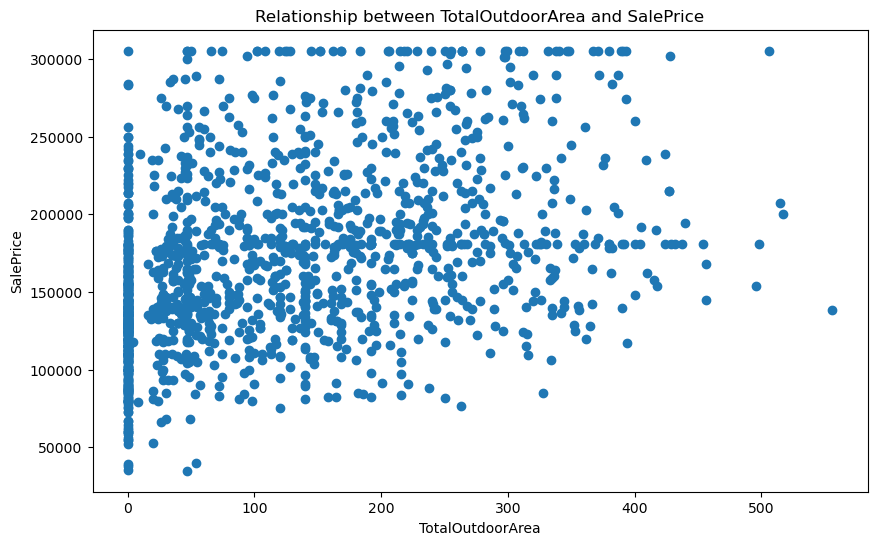

In [1558]:
plt.figure(figsize=(10, 6))
plt.scatter(housing_data['TotalOutdoorArea'],housing_data['SalePrice'])
plt.xlabel('TotalOutdoorArea')
plt.ylabel('SalePrice')
plt.title('Relationship between TotalOutdoorArea and SalePrice')
plt.show()

In [1559]:
housing_data.shape

(1460, 30)

In [1560]:
housing_data.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  \
0         65.0   8450.0          7.0     5.000000        2003.0       196.0   
1         80.0   9600.0          6.0     5.575342        1976.0         0.0   
2         68.0  11250.0          7.0     5.000000        2002.0       162.0   
3         60.0   9550.0          7.0     5.000000        1970.0         0.0   
4         84.0  14260.0          8.0     5.000000        2000.0       265.0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  Low_quality_finished_square_feet  ...  \
0      150.0        856.0     856.0                               0.0  ...   
1      284.0       1262.0    1262.0                               0.0  ...   
2      434.0        920.0     920.0                               0.0  ...   
3      540.0        756.0     961.0                               0.0  ...   
4      490.0       1145.0    1145.0                               0.0  ...   

   SalePrice  PricePerSqFt  AgeAtSale  TotalSqFt  TotalBathrooms  \
0   208500.0     81.254871        5.0     2566.0             2.5   
1   181500.0     71.909667       31.0     2524.0             2.0   
2   223500.0     82.594235        7.0     2706.0             2.5   
3   140000.0     56.611403       91.0     2473.0             1.0   
4   250000.0     74.783129        8.0     3343.0             2.5   

   TotalPorchArea  TotalFinishedSqFt  TotalQualityScore  TotalGarageScore  \
0        61.00000             2416.0          12.000000            1096.0   
1         0.00000             2240.0          11.575342             920.0   
2        42.00000             2272.0          12.000000            1216.0   
3        56.95411             1933.0          12.000000            1926.0   
4        84.00000             2853.0          13.000000            2508.0   

   TotalOutdoorArea  
0              61.0  
1             298.0  
2              42.0  
3              35.0  
4             276.0  

[5 rows x 30 columns]

In [1561]:
housing_data.shape

(1460, 30)

In [1562]:
housing_data.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  \
0         65.0   8450.0          7.0     5.000000        2003.0       196.0   
1         80.0   9600.0          6.0     5.575342        1976.0         0.0   
2         68.0  11250.0          7.0     5.000000        2002.0       162.0   
3         60.0   9550.0          7.0     5.000000        1970.0         0.0   
4         84.0  14260.0          8.0     5.000000        2000.0       265.0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  Low_quality_finished_square_feet  ...  \
0      150.0        856.0     856.0                               0.0  ...   
1      284.0       1262.0    1262.0                               0.0  ...   
2      434.0        920.0     920.0                               0.0  ...   
3      540.0        756.0     961.0                               0.0  ...   
4      490.0       1145.0    1145.0                               0.0  ...   

   SalePrice  PricePerSqFt  AgeAtSale  TotalSqFt  TotalBathrooms  \
0   208500.0     81.254871        5.0     2566.0             2.5   
1   181500.0     71.909667       31.0     2524.0             2.0   
2   223500.0     82.594235        7.0     2706.0             2.5   
3   140000.0     56.611403       91.0     2473.0             1.0   
4   250000.0     74.783129        8.0     3343.0             2.5   

   TotalPorchArea  TotalFinishedSqFt  TotalQualityScore  TotalGarageScore  \
0        61.00000             2416.0          12.000000            1096.0   
1         0.00000             2240.0          11.575342             920.0   
2        42.00000             2272.0          12.000000            1216.0   
3        56.95411             1933.0          12.000000            1926.0   
4        84.00000             2853.0          13.000000            2508.0   

   TotalOutdoorArea  
0              61.0  
1             298.0  
2              42.0  
3              35.0  
4             276.0  

[5 rows x 30 columns]

In [1563]:
housing_data.shape

(1460, 30)

In [1564]:
housing_data.tail()

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
1455         62.0   7917.0          6.0     5.000000        2000.0   
1456         85.0  13175.0          6.0     6.000000        1988.0   
1457         66.0   9042.0          7.0     5.575342        2006.0   
1458         68.0   9717.0          5.0     6.000000        1996.0   
1459         75.0   9937.0          5.0     6.000000        1965.0   

      MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
1455         0.0      953.0        953.0     953.0   
1456       119.0      589.0       1542.0    2073.0   
1457         0.0      877.0       1152.0    1188.0   
1458         0.0        0.0       1078.0    1078.0   
1459         0.0      136.0       1256.0    1256.0   

      Low_quality_finished_square_feet  ...  SalePrice  PricePerSqFt  \
1455                               0.0  ...   175000.0     67.307692   
1456                               0.0  ...   210000.0     58.091286   
1457                               0.0  ...   266500.0     76.317297   
1458                               0.0  ...   142125.0     65.920686   
1459                               0.0  ...   147500.0     58.718153   

      AgeAtSale  TotalSqFt  TotalBathrooms  TotalPorchArea  TotalFinishedSqFt  \
1455        8.0     2600.0             2.5        40.00000        1647.000000   
1456       32.0     3615.0             2.0         0.00000        2909.549315   
1457       69.0     3492.0             2.0        60.00000        2615.000000   
1458       60.0     2156.0             1.0        21.95411        1173.549315   
1459       43.0     2512.0             1.5        68.00000        2132.549315   

      TotalQualityScore  TotalGarageScore  TotalOutdoorArea  
1455          11.000000             920.0         40.000000  
1456          12.000000            1000.0        349.000000  
1457          12.575342             252.0         60.000000  
1458          11.000000             240.0        366.000000  
1459          11.000000             276.0        162.244521  

[5 rows x 30 columns]

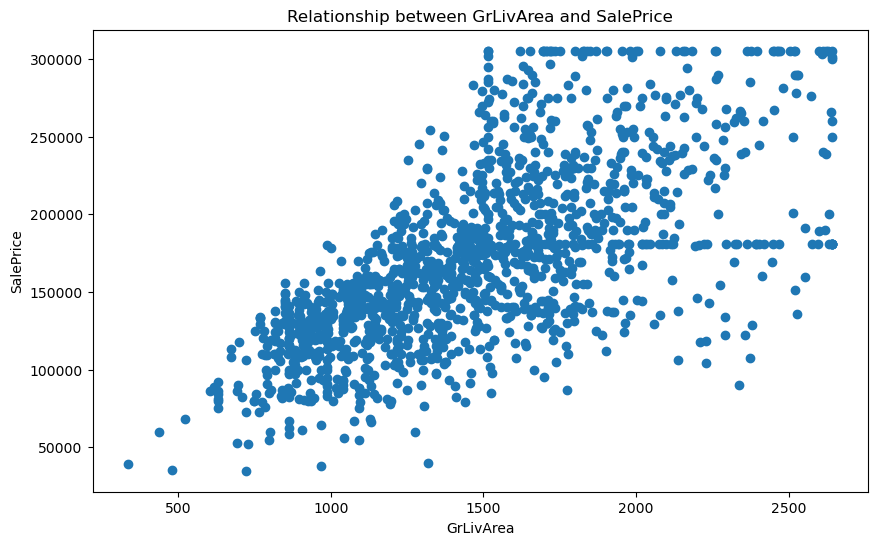

In [1565]:
plt.figure(figsize=(10, 6))
plt.scatter(housing_data['GrLivArea'],housing_data['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Relationship between GrLivArea and SalePrice')
plt.show()

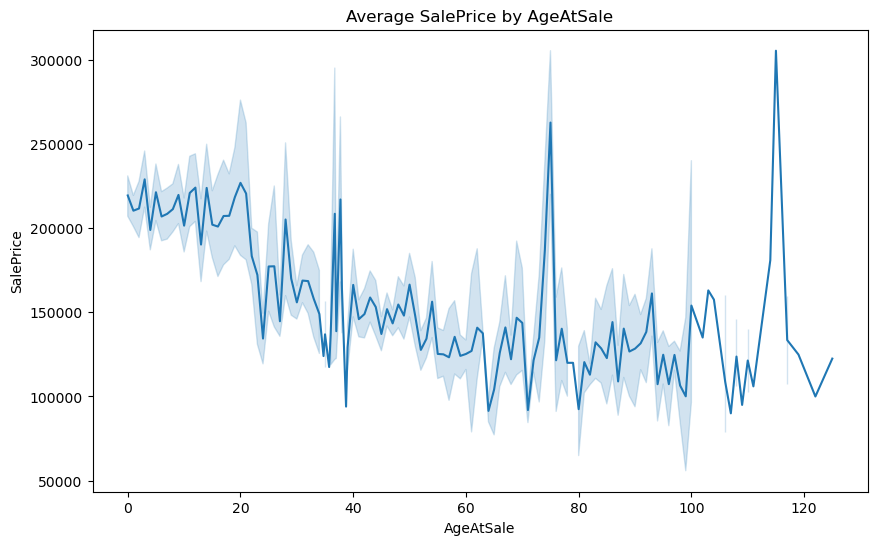

In [1566]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='AgeAtSale', y='SalePrice', data=housing_data)
plt.xlabel('AgeAtSale')
plt.ylabel('SalePrice')
plt.title('Average SalePrice by AgeAtSale')
plt.show()


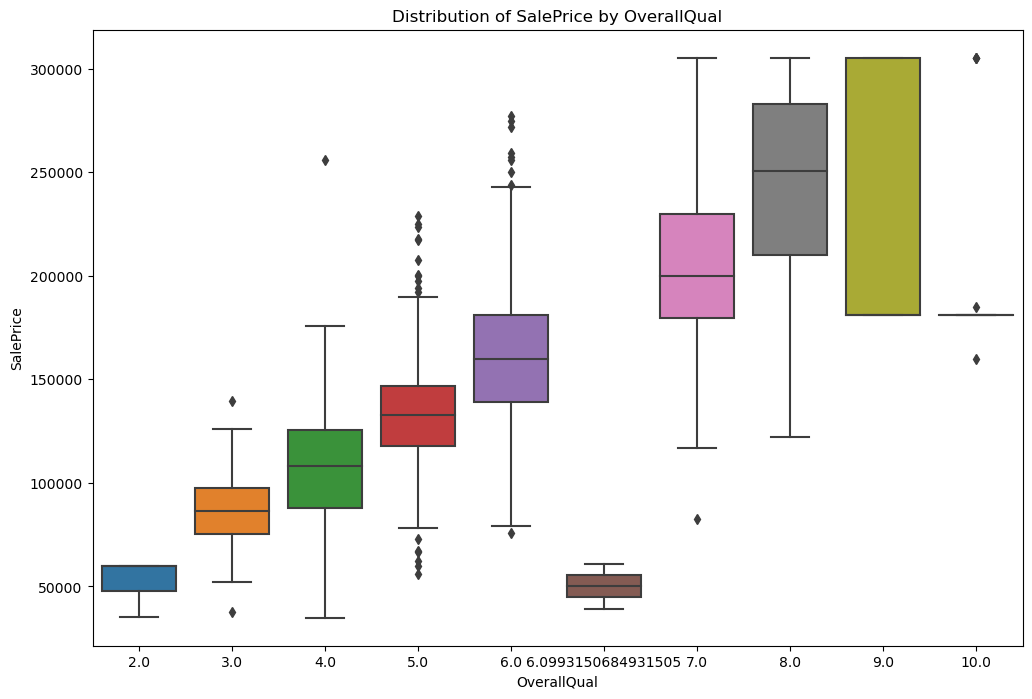

In [1567]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='OverallQual', y='SalePrice', data=housing_data)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Distribution of SalePrice by OverallQual')
plt.show()

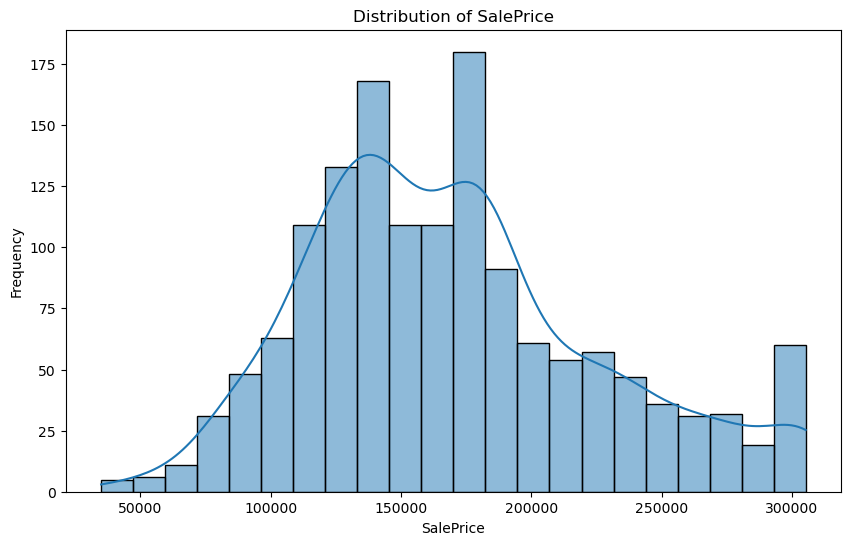

In [1568]:
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['SalePrice'], kde=True)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')
plt.show()

In [1569]:
from sklearn.preprocessing import MinMaxScaler

In [1570]:
scaler = MinMaxScaler()
encoding_housing_data[['TotalSqFt', 'TotalBathrooms']] = scaler.fit_transform(encoding_housing_data[['TotalSqFt', 'TotalBathrooms']])

In [1571]:
scaler = MinMaxScaler()
encoding_housing_data[['TotalSqFt', 'TotalBathrooms']] = scaler.fit_transform(encoding_housing_data[['TotalSqFt', 'TotalBathrooms']])

In [1572]:
housing_data[['TotalSqFt', 'TotalBathrooms']]

TotalSqFt  TotalBathrooms
0        2566.0             2.5
1        2524.0             2.0
2        2706.0             2.5
3        2473.0             1.0
4        3343.0             2.5
...         ...             ...
1455     2600.0             2.5
1456     3615.0             2.0
1457     3492.0             2.0
1458     2156.0             1.0
1459     2512.0             1.5

[1460 rows x 2 columns]

In [1573]:
selected_features = ['TotalSqFt', 'TotalBathrooms', 'Neighborhood_NAmes', 'HouseStyle_2Story']
x = encoding_housing_data[selected_features]
y = encoding_housing_data['SalePrice']

In [1574]:
x

TotalSqFt  TotalBathrooms  Neighborhood_NAmes  HouseStyle_2Story
0      0.195481        0.714286                   0                  1
1      0.191802        0.571429                   0                  0
2      0.207742        0.714286                   0                  1
3      0.187336        0.285714                   0                  1
4      0.263531        0.714286                   0                  1
...         ...             ...                 ...                ...
1455   0.198459        0.714286                   0                  1
1456   0.287353        0.571429                   0                  0
1457   0.276581        0.571429                   0                  1
1458   0.159573        0.285714                   1                  0
1459   0.190751        0.428571                   0                  0

[1460 rows x 4 columns]

In [1575]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [1576]:
correlation_matrix = encoding_housing_data.corr()

In [1577]:
correlation_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)

In [1578]:
print(correlation_with_saleprice.head(10))

SalePrice            1.000000
OverallQual          0.790982
TotalSqFt            0.782260
GrLivArea            0.708624
TotalFinishedSqFt    0.705327
TotalGarageScore     0.680058
PricePerSqFt         0.640819
GarageCars           0.640409
GarageArea           0.623431
TotalBsmtSF          0.613581
Name: SalePrice, dtype: float64


In [1579]:
print(correlation_with_saleprice.tail(10))

HeatingQC_TA             -0.312677
BsmtExposure_No          -0.319990
Foundation_CBlock        -0.343263
Garage_location_Detchd   -0.354141
GarageFinish_Unf         -0.410608
BsmtQual_TA              -0.452394
FireplaceQu_No           -0.471908
Kitchen_Quality_TA       -0.519298
AgeAtSale                -0.523350
ExterQual_TA             -0.589044
Name: SalePrice, dtype: float64


In [1580]:
from sklearn.model_selection import train_test_split

In [1581]:
X=encoding_housing_data.drop('SalePrice',axis=1)
Y=encoding_housing_data.SalePrice

In [1582]:
X

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
0              65     8450            7            5          2003   
1              80     9600            6            8          1976   
2              68    11250            7            5          2002   
3              60     9550            7            5          1970   
4              84    14260            8            5          2000   
...           ...      ...          ...          ...           ...   
1455           62     7917            6            5          2000   
1456           85    13175            6            6          1988   
1457           66     9042            7            9          2006   
1458           68     9717            5            6          1996   
1459           75     9937            5            6          1965   

      MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0            196        150          856       856   
1              0        284         1262      1262   
2            162        434          920       920   
3              0        540          756       961   
4            350        490         1145      1145   
...          ...        ...          ...       ...   
1455           0        953          953       953   
1456         119        589         1542      2073   
1457           0        877         1152      1188   
1458           0          0         1078      1078   
1459           0        136         1256      1256   

      Low_quality_finished_square_feet  ...  SaleType_ConLI  SaleType_ConLw  \
0                                    0  ...               0               0   
1                                    0  ...               0               0   
2                                    0  ...               0               0   
3                                    0  ...               0               0   
4                                    0  ...               0               0   
...                                ...  ...             ...             ...   
1455                                 0  ...               0               0   
1456                                 0  ...               0               0   
1457                                 0  ...               0               0   
1458                                 0  ...               0               0   
1459                                 0  ...               0               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0                0             0            1                      0   
1                0             0            1                      0   
2                0             0            1                      0   
3                0             0            1                      0   
4                0             0            1                      0   
...            ...           ...          ...                    ...   
1455             0             0            1                      0   
1456             0             0            1                      0   
1457             0             0            1                      0   
1458             0             0            1                      0   
1459             0             0            1                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                        0                     0                     1   
1                        0                     0                     1   
2                        0                     0                     1   
3                        0                     0                     0   
4                        0                     0                     1   
...                    ...                   ...                   ...   
1455                     0                     0                     1   
1456                     0                     0                     1   
1457                     0          

In [1583]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [1584]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [1585]:
X_train

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
254            70     8400            5            6          1957   
1066           59     7837            6            7          1994   
638            67     8777            5            7          1950   
799            60     7200            5            7          1950   
380            50     5000            5            6          1950   
...           ...      ...          ...          ...           ...   
1095           78     9317            6            5          2006   
1130           65     7804            4            3          1950   
1294           60     8172            5            7          1990   
860            55     7642            7            8          1998   
1126           53     3684            7            5          2007   

      MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
254            0        392         1314      1314   
1066           0        799          799       799   
638            0        796          796       796   
799          252        162          731       981   
380            0        808         1026      1026   
...          ...        ...          ...       ...   
1095           0       1290         1314      1314   
1130           0        500         1122      1328   
1294           0        697          864       864   
860            0        912          912       912   
1126         130       1373         1373      1555   

      Low_quality_finished_square_feet  ...  SaleType_ConLI  SaleType_ConLw  \
254                                  0  ...               0               0   
1066                                 0  ...               0               0   
638                                  0  ...               0               0   
799                                  0  ...               0               0   
380                                  0  ...               0               0   
...                                ...  ...             ...             ...   
1095                                 0  ...               0               0   
1130                                 0  ...               0               0   
1294                                 0  ...               0               0   
860                                  0  ...               0               0   
1126                                 0  ...               0               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
254              0             0            1                      0   
1066             0             0            1                      0   
638              0             0            1                      0   
799              0             0            1                      0   
380              0             0            1                      0   
...            ...           ...          ...                    ...   
1095             0             0            1                      0   
1130             0             0            1                      0   
1294             0             0            1                      0   
860              0             0            1                      0   
1126             0             0            1                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
254                      0                     0                     1   
1066                     0                     0                     1   
638                      0                     0                     1   
799                      0                     0                     1   
380                      0                     0                     1   
...                    ...                   ...                   ...   
1095                     0                     0                     1   
1130                     0                     0                     1   
1294                     0          

In [1586]:
X_test

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  \
892            70     8414            6            8          2003   
1105           98    12256            8            5          1995   
413            56     8960            5            6          1950   
522            50     5000            6            7          1950   
1036           89    12898            9            5          2008   
...           ...      ...          ...          ...           ...   
479            50     5925            4            7          2000   
1361          124    16158            7            5          2005   
802            63     8199            7            5          2005   
651            60     9084            4            5          1950   
722            70     8120            4            7          1970   

      MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
892            0        396         1059      1068   
1105         362        431         1463      1500   
413            0       1008         1008      1028   
522            0        605         1004      1004   
1036          70        598         1620      1620   
...          ...        ...          ...       ...   
479          435        739          907      1131   
1361          16        256         1530      1530   
802            0         80          728       728   
651            0        755          755       755   
722            0        673          864       864   

      Low_quality_finished_square_feet  ...  SaleType_ConLI  SaleType_ConLw  \
892                                  0  ...               0               0   
1105                                 0  ...               0               0   
413                                  0  ...               0               0   
522                                  0  ...               0               0   
1036                                 0  ...               0               0   
...                                ...  ...             ...             ...   
479                                  0  ...               0               0   
1361                                 0  ...               0               0   
802                                  0  ...               0               0   
651                                  0  ...               0               0   
722                                  0  ...               0               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
892              0             0            1                      0   
1105             0             0            1                      0   
413              0             0            1                      0   
522              0             0            1                      0   
1036             0             0            1                      0   
...            ...           ...          ...                    ...   
479              0             0            1                      0   
1361             0             0            1                      0   
802              0             0            1                      0   
651              0             0            1                      0   
722              0             0            1                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
892                      0                     0                     1   
1105                     0                     0                     1   
413                      0                     0                     1   
522                      0                     0                     1   
1036                     0                     0                     1   
...                    ...                   ...                   ...   
479                      1                     0                     0   
1361                     0                     0                     1   
802                      0          

In [1587]:
Y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
479      89471
1361    260000
802     189000
651     108000
722     124500
Name: SalePrice, Length: 292, dtype: int64

In [1588]:
Y_train

254     145000
1066    178000
638      85000
799     175000
380     127000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 1168, dtype: int64

In [1589]:
from sklearn.ensemble import RandomForestRegressor

In [1590]:
model = RandomForestRegressor()

In [1591]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [1592]:
y_pred = model.predict(X_test)

In [1593]:
y_pred

array([153099.8 , 346489.87, 113073.32, 162589.9 , 318019.74,  82633.5 ,
       253272.75, 147238.87,  85892.  , 134795.5 , 146320.5 , 129886.  ,
        86952.16, 216660.28, 177606.19, 134837.  , 183646.56, 134924.  ,
       117296.62, 225504.1 , 153745.5 , 217762.86, 173955.92, 127569.7 ,
       190608.5 , 156390.14, 181228.16, 132994.5 , 180106.14, 209355.09,
       131023.1 , 273514.24, 182441.  , 134043.4 , 256501.38, 141982.5 ,
       139667.5 , 215331.8 , 310890.41, 102734.5 ,  99011.  , 208178.5 ,
       119850.  , 257728.25, 129863.  , 119614.83, 117986.  , 125939.  ,
       441419.25, 144843.37, 121644.5 , 195549.  , 117391.7 , 315050.  ,
       141856.  , 256349.14, 215228.5 , 173859.  , 109469.33, 105002.5 ,
        79404.  , 157132.15, 321642.18, 274161.48, 290382.58, 242426.52,
       109416.5 , 308599.7 ,  97360.5 , 175957.6 , 122141.78, 134901.5 ,
       110101.5 ,  89447.  , 520778.91, 172676.95, 336324.89, 331103.57,
       142197.  , 126799.08, 110627.56,  79439.66, 

In [1594]:
score = model.score(X_test, Y_test)
print(f'Model Score: {score}')

Model Score: 0.9749217268044588


In [1595]:
from sklearn.metrics import mean_squared_error, r2_score

In [1596]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 192358536.1227586
R-squared: 0.9749217268044588


In [1597]:
from sklearn.linear_model import LinearRegression

In [1598]:
model = LinearRegression()

In [1599]:
model.fit(X_train,Y_train)

LinearRegression()

In [1600]:
Y_pred = model.predict(X_test)

In [1601]:
Y_pred

array([ 155834.53736845,  338060.18951049,   99866.86992923,
        159021.50507417,  315216.58709572,   64381.07876678,
        310090.51722851,  142032.70521605,   83936.75210109,
        144167.41548721,  141593.31838553,  140746.6081654 ,
         51478.39277278,  218105.49673923,  176738.9916562 ,
        132612.247506  ,  177964.38343142,  128659.48464585,
        124319.63447357,  223790.71209828,  162610.03057535,
        215691.17215502,  174217.51110072,  124126.30832556,
        187806.48576313,  140352.38056425,  173610.28378741,
        150575.26044831,  178285.6141857 ,  200167.0345512 ,
        148022.17031487,  290550.99044195,  259485.85651562,
        129928.04999672,  251318.14072765,  136801.25795037,
        150015.57401676,  214380.05694295,  307630.26357875,
        140432.25444592,   92501.81196964,  208752.85069685,
        113726.05884707,  312171.2256511 ,  123823.12052506,
        141188.92430253,  112515.91253711,  126938.22967748,
        439869.62203369,

In [1602]:
score = model.score(X_test, Y_test)
print(f'Model Score: {score}')

Model Score: 0.8179650559777571


In [1603]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1396267401.7576506
R-squared: 0.8179650559777571


In [1604]:
housing_data.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  \
0         65.0   8450.0          7.0     5.000000        2003.0       196.0   
1         80.0   9600.0          6.0     5.575342        1976.0         0.0   
2         68.0  11250.0          7.0     5.000000        2002.0       162.0   
3         60.0   9550.0          7.0     5.000000        1970.0         0.0   
4         84.0  14260.0          8.0     5.000000        2000.0       265.0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  Low_quality_finished_square_feet  ...  \
0      150.0        856.0     856.0                               0.0  ...   
1      284.0       1262.0    1262.0                               0.0  ...   
2      434.0        920.0     920.0                               0.0  ...   
3      540.0        756.0     961.0                               0.0  ...   
4      490.0       1145.0    1145.0                               0.0  ...   

   SalePrice  PricePerSqFt  AgeAtSale  TotalSqFt  TotalBathrooms  \
0   208500.0     81.254871        5.0     2566.0             2.5   
1   181500.0     71.909667       31.0     2524.0             2.0   
2   223500.0     82.594235        7.0     2706.0             2.5   
3   140000.0     56.611403       91.0     2473.0             1.0   
4   250000.0     74.783129        8.0     3343.0             2.5   

   TotalPorchArea  TotalFinishedSqFt  TotalQualityScore  TotalGarageScore  \
0        61.00000             2416.0          12.000000            1096.0   
1         0.00000             2240.0          11.575342             920.0   
2        42.00000             2272.0          12.000000            1216.0   
3        56.95411             1933.0          12.000000            1926.0   
4        84.00000             2853.0          13.000000            2508.0   

   TotalOutdoorArea  
0              61.0  
1             298.0  
2              42.0  
3              35.0  
4             276.0  

[5 rows x 30 columns]

In [1605]:
avg_price_by_year = housing_data.groupby('YrSold')['SalePrice'].mean()

In [1606]:
avg_price_by_year

YrSold
2006.0    170711.430138
2007.0    174077.691087
2008.0    169431.894835
2009.0    167938.808989
2010.0    167267.217431
Name: SalePrice, dtype: float64

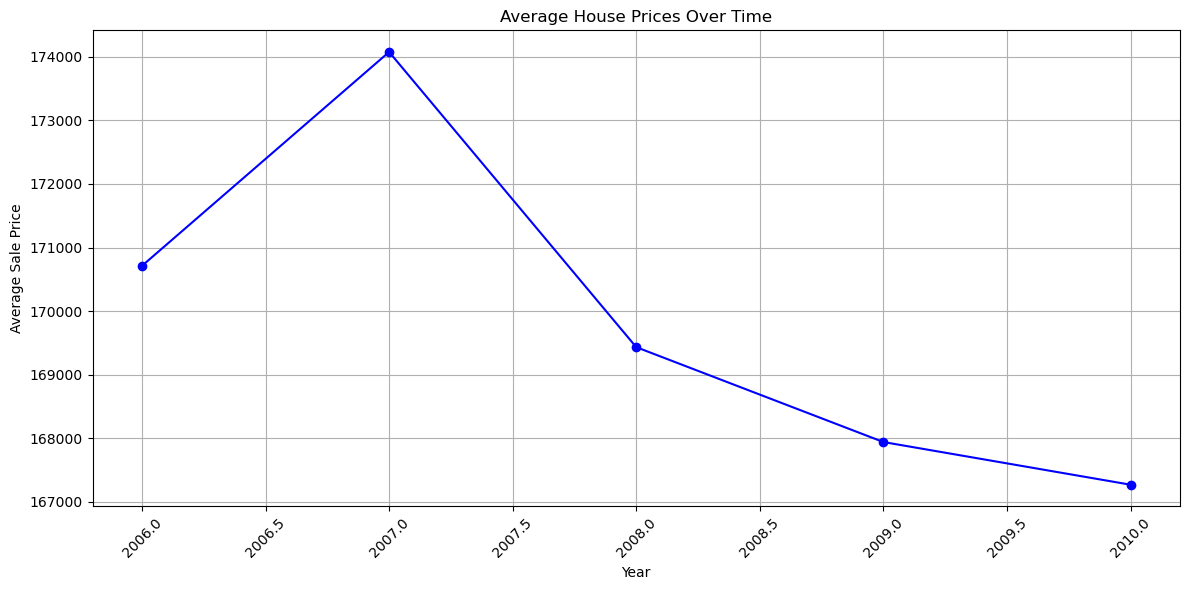

In [1607]:
plt.figure(figsize=(12, 6))
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', color='b', linestyle='-')
plt.title('Average House Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [1608]:
housing_data.set_index('YrSold', inplace=True)

In [1609]:
import statsmodels.api as sm

In [1610]:
decomposition = sm.tsa.seasonal_decompose(housing_data['SalePrice'], model='additive', period=12)

In [1611]:
decomposition

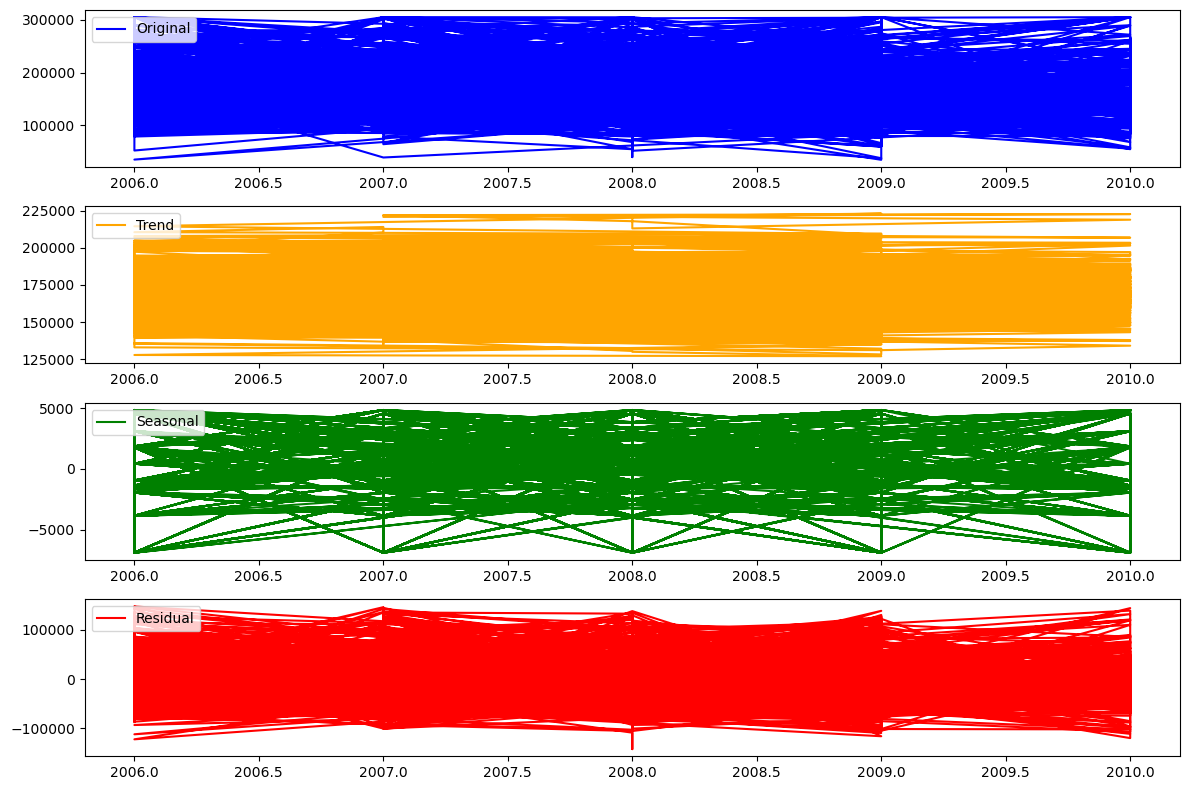

In [1623]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Perform seasonal decomposition
decomposition = seasonal_decompose(housing_data['SalePrice'], model='additive', period=12)

# Plot the decomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(housing_data['SalePrice'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [1624]:
print(housing_data.columns)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       'Low_quality_finished_square_feet', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'miscellaneous_feature', 'SalePrice',
       'PricePerSqFt', 'AgeAtSale', 'TotalSqFt', 'TotalBathrooms',
       'TotalPorchArea', 'TotalFinishedSqFt', 'TotalQualityScore',
       'TotalGarageScore', 'TotalOutdoorArea'],
      dtype='object')


In [1625]:
amenities_columns = [ 'GarageArea', 'Fireplaces']

In [1626]:
amenities_data = housing_data[amenities_columns]

In [1627]:
print(amenities_data.head())

        GarageArea  Fireplaces
YrSold                        
2008.0       548.0         0.0
2007.0       460.0         1.0
2008.0       608.0         1.0
2006.0       642.0         1.0
2008.0       836.0         1.0


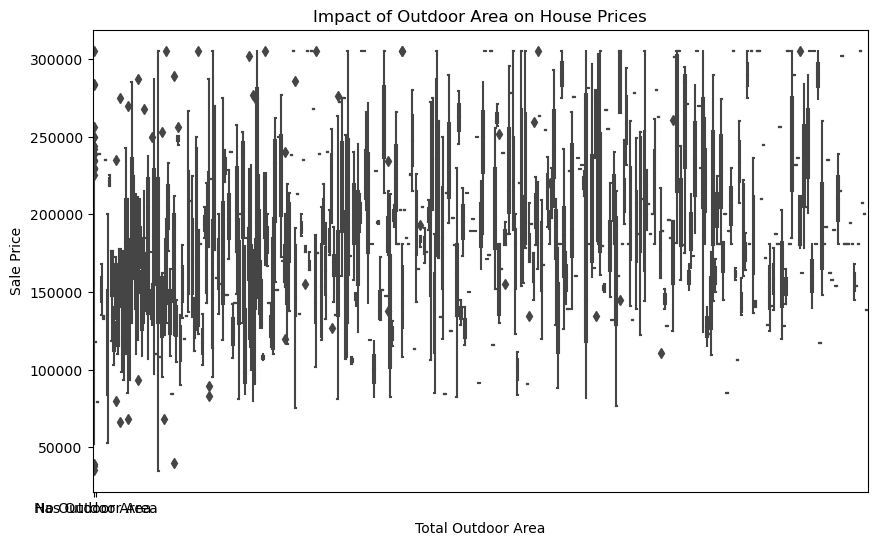

In [1628]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TotalOutdoorArea', y='SalePrice', data=housing_data)
plt.title('Impact of Outdoor Area on House Prices')
plt.xlabel('Total Outdoor Area')
plt.ylabel('Sale Price')
plt.xticks([0, 1], ['No Outdoor Area', 'Has Outdoor Area'])  # Ensure categories match dataset
plt.show()
